# MACHINE LEARNING - Group Coursework 2

Group 14: Matheus Maciel, Vy Nguyen

# Project Description

Download the customer-personality.csv data from Moodle. This dataset contains information of customers that can make the company better understand the behaviour of their customers. Explore the dataset and report any interesting findings.

Personal details
- ID: Customer's unique identifer
- Year Birth: Customer's birth year
- Education: Customer's education level
- Marital Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase

Goods:
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on  sh in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotions:
- NumDealsPurchases: Number of purchases made with a discount

Channels:
- NumWebPurchases: Number of purchases made through the company's website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's website in the last month

# Project Goal

Customer Personality Analysis is a crucial task for the company to sustain and improve its position in today's intensively competitive market.

By leveraging an understanding in the current customer market, company owns competitive advantages in optimising customer experience, creating more engaging content, and hence, generating more sales.


# Outline 

1. Pre-processing data
2. Exploratory data analysis
3. Dimension reductionand customer segmentation

# Segmentation Methods

Dimension Reduction Method: Principal Component Analysis (PCA)
- K-Means Clustering with PCA Results
- Hierarchical Clustering with PCA Results

Dimension Reduction Method: Factor Analysis (FA)
- K-Means Clustering with FA Results
- Hierarchical Clustering with FA Results

Comparison of PCA and FA Segmentation Results

Customer Segmentation using Customer Value Score

# Pre-processing Data

## Import packages

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set theme for plots
sns.set_theme(style='darkgrid')
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.family':'serif'})

## Load data

In [3]:
# read the dataset
original = pd.read_csv('/Users/matheusmaciel/CASS/MSc 2021-22 /Term 2/Machine Learning/final/customer-personality.csv')

In [4]:
# check the shape of the dataset
original.shape

(2240, 20)

Excluding the ID, we have 2240 observations with 19 features.

In [5]:
# describe dataset
original.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [6]:
# find the basic information regarding dataset
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Here, we have only three object type datatypes and the rest are numerical.

## Inspect Missing Values

In [7]:
# check the number of unique values present in each column
original.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
dtype: int64

In [8]:
# check for null values
original.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

<AxesSubplot:>

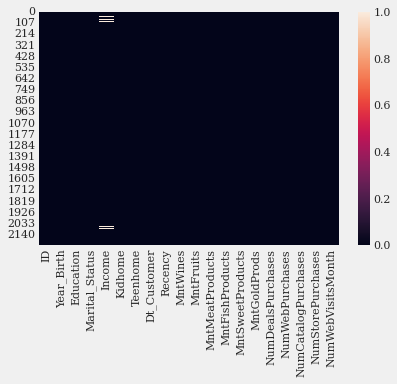

In [9]:
# heatmap displayng missing values
sns.heatmap(original.isnull())

In [10]:
# compute the percentage of null values
a = original.isna().sum().sum()*100/(original.shape[0]*original.shape[1]) 
print("Percentage of null values in the dataset:",a)

Percentage of null values in the dataset: 0.05357142857142857


In [11]:
# compute the percentage of null values at each variable
percent_missing = original.isnull().sum()*100/len(original)
percent_missing

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
dtype: float64

The missing data is only found in the Income feature, which accounts for 1% within the feature, and 0.05% against the whole dataset. Hence, dropping these observations will not affect the significance of the final result.

In [12]:
# drop missing values
original = original.dropna()

# check for null values
original.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

## Inspect column values

We will inspect if the number of children and teenagers in customers' household share the same value at each row.

In [13]:
# Returns: bool True if all elements are the same in both objects, we will drop one column.
# Or False otherwise, we keep both columns
original['Kidhome'].equals(original['Teenhome'])

False

The columnns Teenhome and Kidhome do not  share the same values at each rows.

In [14]:
# display unique values of 'Year_Birth' column
original['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976,
       1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989,
       1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955,
       1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953,
       1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

Text(0.5, 1.0, 'Distribution of Year of Birth')

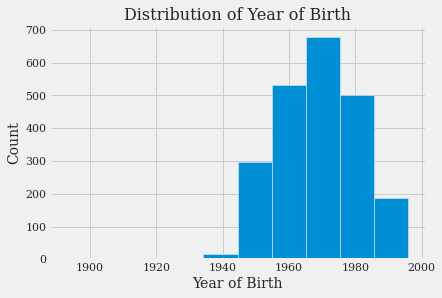

In [15]:
# distribution of 'Year_Birth'
# set up color pallet
original['Year_Birth'].hist()
plt.xlabel('Year of Birth', size=14)
plt.ylabel('Count', size=14)
plt.title('Distribution of Year of Birth', size=16)

In [16]:
# display unique values of 'Marital_Status' column
original['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Text(0.5, 1.0, 'Distribution Of Marital Status')

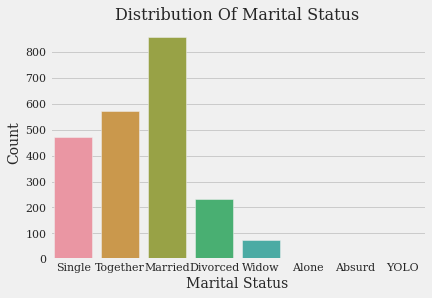

In [17]:
# distribution of 'Marital_Status'
pl = sns.countplot(x=original["Marital_Status"])
pl.set_xlabel("Marital Status", size=14)
pl.set_ylabel("Count", size=14)
pl.set_title("Distribution Of Marital Status", size=16)

It presents there are unclear marital status that can be classified into 2 values: "Single" and "In Relationship":
- Together, Married: 
- 'Single, Alone, YOLO, Absurd

In [18]:
# display unique values of 'Kidhome' column
original['Kidhome'].unique()

array([0, 1, 2])

Text(0.5, 1.0, 'Distribution of Number of Kids Home')

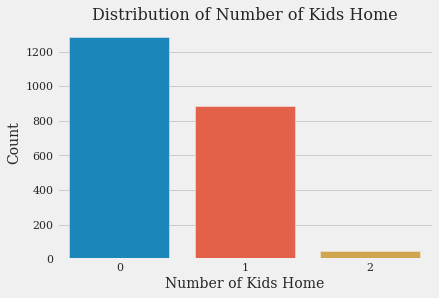

In [19]:
# distribution of 'Kidhome'
sns.countplot(x=original["Kidhome"])
plt.xlabel('Number of Kids Home',size=14)
plt.ylabel('Count',size=14)
plt.title('Distribution of Number of Kids Home',size=16)

In [20]:
# display unique values of 'Teenhome' column
original['Teenhome'].unique()

array([0, 1, 2])

Text(0.5, 1.0, 'Distribution of Number of Teens Home')

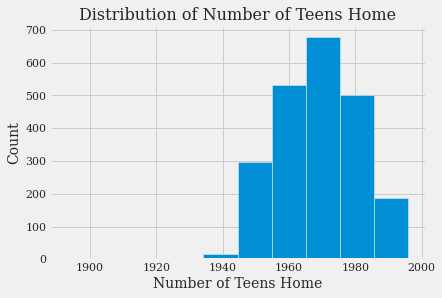

In [21]:
# distribution of 'Teenhome'
original['Year_Birth'].hist()
plt.xlabel('Number of Teens Home',size=14)
plt.ylabel('Count',size=14)
plt.title('Distribution of Number of Teens Home',size=16)

In [22]:
# display unique values of 'Recency' column
original['Recency'].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86,
       41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3, 88,
       72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 40,  9, 87,
        5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65,
       13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45,
       14, 52, 93, 50, 60, 11, 66, 97, 62,  6, 33, 22, 71, 67,  7])

The above initial analysis indicates the existence of several categorical variables in the dataset, that need to be pre-processed before analysis. We perform encoding.

Text(0.5, 1.0, 'Distribution of Yearly Income')

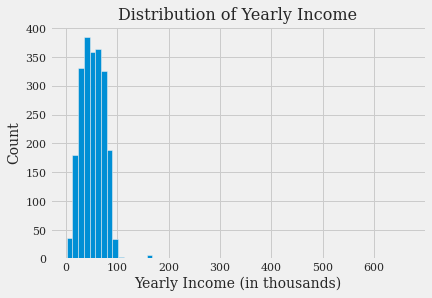

In [23]:
# distribution of 'Income'
(original['Income']/1000).hist(bins=60)
plt.xlabel('Yearly Income (in thousands)',size=14)
plt.ylabel('Count',size=14)
plt.title('Distribution of Yearly Income',size=16)

In [24]:
year = pd.DatetimeIndex(original['Dt_Customer']).year
year = pd.DataFrame({'Year':year})
year

,Year
0,2012
1,2014
2,2013
3,2014
4,2014
...,...
2211,2013
2212,2014
2213,2014
2214,2014


Text(0.5, 1.0, 'Customer’s Enrollment by Year')

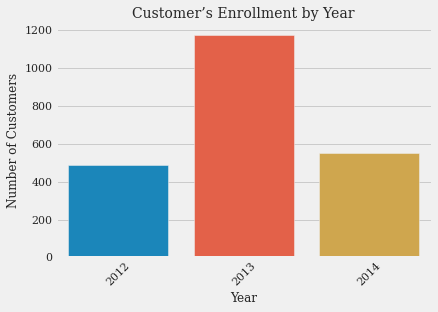

In [25]:
# distribution of 'Dt_Customer'
sns.countplot(x=year["Year"])
plt.xlabel('Year',size=12)
plt.ylabel('Number of Customers',size=12)
plt.xticks(rotation=45)
plt.title('Customer’s Enrollment by Year',size=14)

Text(0.5, 1.0, 'Amount spent on wine over 2 years')

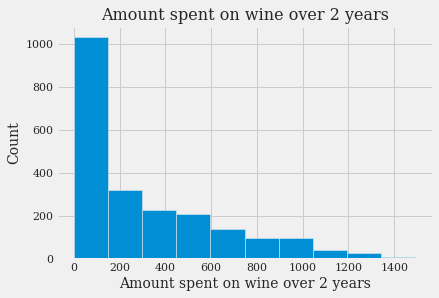

In [26]:
# distribution of 'MntWines'
original['MntWines'].hist()
plt.xlabel('Amount spent on wine over 2 years',size=14)
plt.ylabel('Count',size=14)
plt.title('Amount spent on wine over 2 years',size=16)

Text(0.5, 1.0, 'Amount spent on fruits over 2 years')

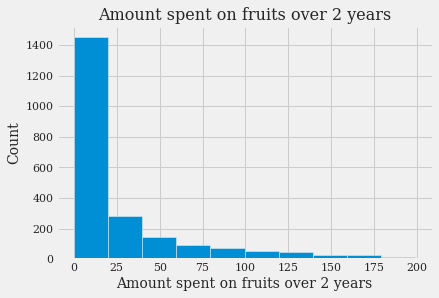

In [27]:
# distribution of 'MntFruits'
original['MntFruits'].hist()
plt.xlabel('Amount spent on fruits over 2 years',size=14)
plt.ylabel('Count',size=14)
plt.title('Amount spent on fruits over 2 years',size=16)

Text(0.5, 1.0, 'Amount spent on meat over 2 years')

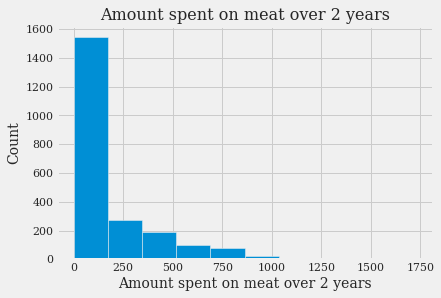

In [28]:
# distribution of 'MntMeatProducts'
original['MntMeatProducts'].hist()
plt.xlabel('Amount spent on meat over 2 years',size=14)
plt.ylabel('Count',size=14)
plt.title('Amount spent on meat over 2 years',size=16)

Text(0.5, 1.0, 'Amount spent on fish over 2 years')

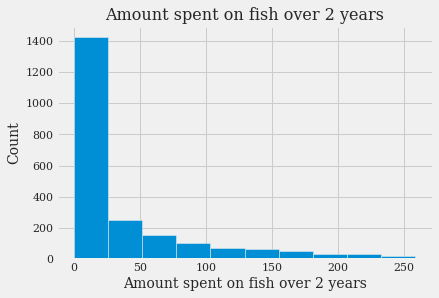

In [29]:
# distribution of 'MntFishProducts'
original['MntFishProducts'].hist()
plt.xlabel('Amount spent on fish over 2 years',size=14)
plt.ylabel('Count',size=14)
plt.title('Amount spent on fish over 2 years',size=16)

Text(0.5, 1.0, 'Amount spent on sweets over 2 years')

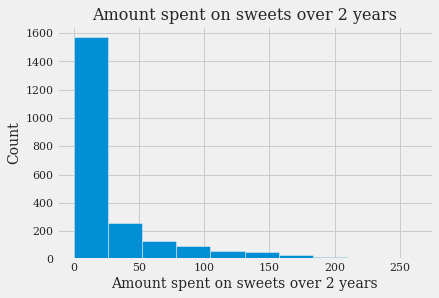

In [30]:
# distribution of 'MntSweetProducts'
original['MntSweetProducts'].hist()
plt.xlabel('Amount spent on sweets over 2 years',size=14)
plt.ylabel('Count',size=14)
plt.title('Amount spent on sweets over 2 years',size=16)

Text(0.5, 1.0, 'Amount spent on gold over 2 years')

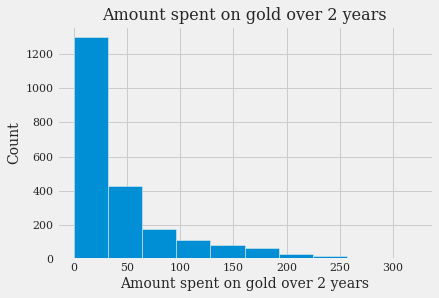

In [31]:
# distribution of 'MntGoldProds'
original['MntGoldProds'].hist()
plt.xlabel('Amount spent on gold over 2 years',size=14)
plt.ylabel('Count',size=14)
plt.title('Amount spent on gold over 2 years',size=16)

In [32]:
original.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

Text(0.5, 1.0, 'Number of Deals Purchases')

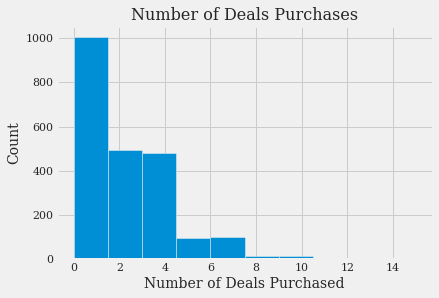

In [33]:
original['NumDealsPurchases'].hist()
plt.xlabel('Number of Deals Purchased',size=14)
plt.ylabel('Count',size=14)
plt.title('Number of Deals Purchases',size=16)

Text(0.5, 1.0, 'Number of Web Purchases')

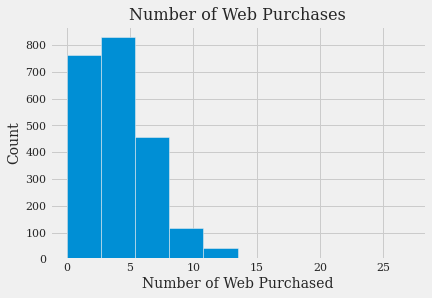

In [34]:
original['NumWebPurchases'].hist()
plt.xlabel('Number of Web Purchased',size=14)
plt.ylabel('Count',size=14)
plt.title('Number of Web Purchases',size=16)

Text(0.5, 1.0, 'Number of Catalog Purchases')

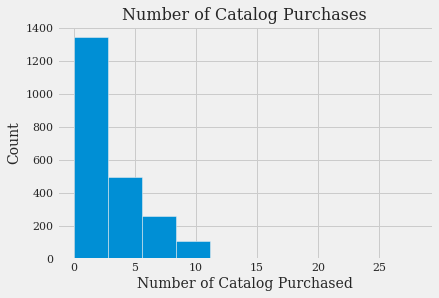

In [35]:
original['NumCatalogPurchases'].hist()
plt.xlabel('Number of Catalog Purchased',size=14)
plt.ylabel('Count',size=14)
plt.title('Number of Catalog Purchases',size=16)

Text(0.5, 1.0, 'Number of Store Purchases')

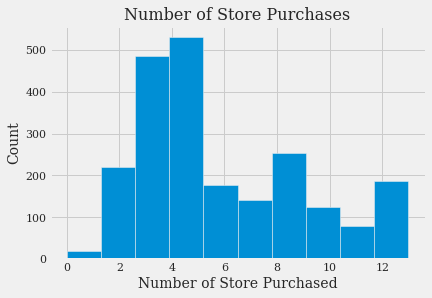

In [36]:
original['NumStorePurchases'].hist()
plt.xlabel('Number of Store Purchased',size=14)
plt.ylabel('Count',size=14)
plt.title('Number of Store Purchases',size=16)

## Feature Engineering

The initial analysis above indicates the existence of several categorical variables in the dataset, that need to be encoded before analysis.

In the below cell, we look at each customer to:

- Calculate the age
- Calculate the total expense 
- Calculate the total number of children 
- Calculate the total number of purchases
- Calculate the enrolment days
- Group the marital status: 0 as 'Single' and 1 as 'In Relationship'

In [37]:
# use the separate dataset to inspect
data = original.copy()
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [38]:
# Add new columns 

# create 'age' column
data["age"] = 2021-data["Year_Birth"]

# compute 'total_spending' column
data["total_spend"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

# compute the number of enrollment days
data['today'] = pd.to_datetime('today')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['num_days'] = data['today'] - data['Dt_Customer']

# compute the number of enrollment months
data['num_mons'] = 12 * (data['today'].dt.year - data['Dt_Customer'].dt.year) + (data['today'].dt.month - data['Dt_Customer'].dt.month)
data['num_mons'] = round(data['num_mons']/12)

data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,today,num_days,num_mons
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,3,8,10,4,7,64,1617,2022-04-06 13:38:29.757901,3649 days 13:38:29.757901,10.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,1,1,2,5,67,27,2022-04-06 13:38:29.757901,2803 days 13:38:29.757901,8.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,56,776,2022-04-06 13:38:29.757901,3150 days 13:38:29.757901,9.0


In [39]:
# create conversion rate column
# we will use this column to inspect after clustering
data['conversion_rate'] = 0

for x in data['NumWebPurchases']:
    if x == 0:
        data['conversion_rate'] = 0
    else:
        data['conversion_rate'] = round(x/data['NumWebVisitsMonth'],2)

# filter infinity or null values
data.loc[(data['NumWebPurchases']== 0) | (data['NumWebVisitsMonth'] == 0), 'conversion_rate'] = 0
# check result
data['conversion_rate'].unique()

array([0.43, 0.6 , 0.75, 0.5 , 0.38, 0.33, 0.15, 1.5 , 1.  , 0.  , 3.  ,
       0.3 , 0.18, 0.23])

In [40]:
# Consolidate columns

# consolidate 'Kidhome' and 'Teenhome' into one column
data['kids'] = data['Kidhome'] + data['Teenhome']

# consolidate 'web' , 'catalog' , 'store' and 'deals' purchases into one column
data['total_purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [41]:
# Encode categorical values

# encode 'Marital_Status' column
# 'In Relationship' category
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],1)
# 'Single' category      
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd', 'Single'],0)     

# encode 'Education' column
data['Education'] = data['Education'].replace({'Basic': 1,'2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5})

# view cleaned dataset
data.describe()

#data.to_csv("cleaned.csv")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_days,num_mons,conversion_rate,kids,total_purchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,3.459838,0.645307,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,...,2.671029,5.800993,5.319043,52.179603,607.075361,3190 days 13:47:35.606276512,8.753159,0.787148,0.947202,14.880866
std,3249.376275,11.985554,1.004825,0.478528,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,...,2.926734,3.250785,2.425359,11.985554,602.900476,232 days 11:15:24.558024988,0.739708,0.680059,0.749062,7.670957
min,0.000000,1893.000000,1.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,25.000000,5.000000,2678 days 13:38:29.757901,7.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,3.000000,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,...,0.000000,3.000000,3.000000,44.000000,69.000000,3018 days 13:38:29.757900992,8.000000,0.430000,0.000000,8.000000
50%,5458.500000,1970.000000,3.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,...,2.000000,5.000000,6.000000,51.000000,396.500000,3191 days 13:38:29.757900992,9.000000,0.500000,1.000000,15.000000
75%,8421.750000,1977.000000,4.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,...,4.000000,8.000000,7.000000,62.000000,1048.000000,3364 days 13:38:29.757900992,9.000000,0.750000,1.000000,21.000000
max,11191.000000,1996.000000,5.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,...,28.000000,13.000000,20.000000,128.000000,2525.000000,3741 days 13:38:29.757901,10.000000,3.000000,3.000000,44.000000


In [42]:
# inspect the dataset range
data.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_days,num_mons,conversion_rate,kids,total_purchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,3.459838,0.645307,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,...,2.671029,5.800993,5.319043,52.179603,607.075361,3190 days 13:47:35.606276512,8.753159,0.787148,0.947202,14.880866
std,3249.376275,11.985554,1.004825,0.478528,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,...,2.926734,3.250785,2.425359,11.985554,602.900476,232 days 11:15:24.558024988,0.739708,0.680059,0.749062,7.670957
min,0.000000,1893.000000,1.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,25.000000,5.000000,2678 days 13:38:29.757901,7.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,3.000000,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,...,0.000000,3.000000,3.000000,44.000000,69.000000,3018 days 13:38:29.757900992,8.000000,0.430000,0.000000,8.000000
50%,5458.500000,1970.000000,3.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,...,2.000000,5.000000,6.000000,51.000000,396.500000,3191 days 13:38:29.757900992,9.000000,0.500000,1.000000,15.000000
75%,8421.750000,1977.000000,4.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,...,4.000000,8.000000,7.000000,62.000000,1048.000000,3364 days 13:38:29.757900992,9.000000,0.750000,1.000000,21.000000
max,11191.000000,1996.000000,5.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,...,28.000000,13.000000,20.000000,128.000000,2525.000000,3741 days 13:38:29.757901,10.000000,3.000000,3.000000,44.000000


In [43]:
# We find that at the "total_purchases" columns, the minimum value is 0
# Which means that here are customers who have not made a purchase over 2 years
# Hence, we will drop them out of the analysis as they show no interest in products/services offering

# get indexes of customers who not making any purchase
no_purchases = data[data['total_purchases']==0].index
# check the number of no interested customers
print("The number of customers not interested in products/services:",len(no_purchases))
# drop no interested customers
data.drop(no_purchases , inplace=True)

The number of customers not interested in products/services: 4


# Exploratory Data Analysis

Text(0.5, 1.0, 'Age Distribution')

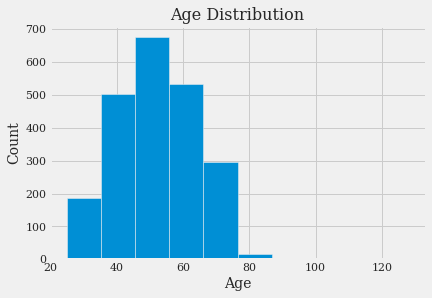

In [44]:
# plot age distribution
data['age'].hist()
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.title("Age Distribution", size=16)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Enrollment Months')

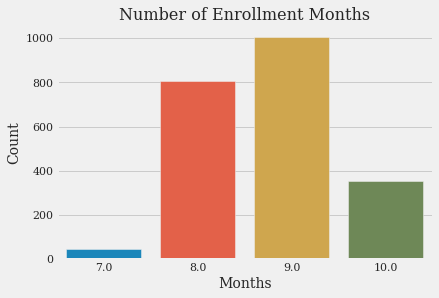

In [45]:
# plot enrollment days
sns.countplot(data['num_mons'])
plt.xlabel('Months', size=14)
plt.ylabel('Count', size=14)
plt.title("Number of Enrollment Months", size=16)

Text(0.5, 1.0, 'Marital Status')

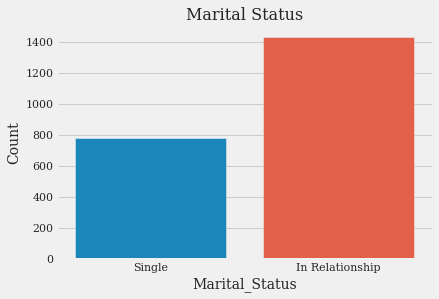

In [46]:
# plot enrollment days
sns.countplot(x=data['Marital_Status'])
plt.xlabel('Marital_Status', size=14)
plt.ylabel('Count', size=14)
plt.xticks([0,1],['Single','In Relationship'])
plt.title("Marital Status", size=16)

<AxesSubplot:>

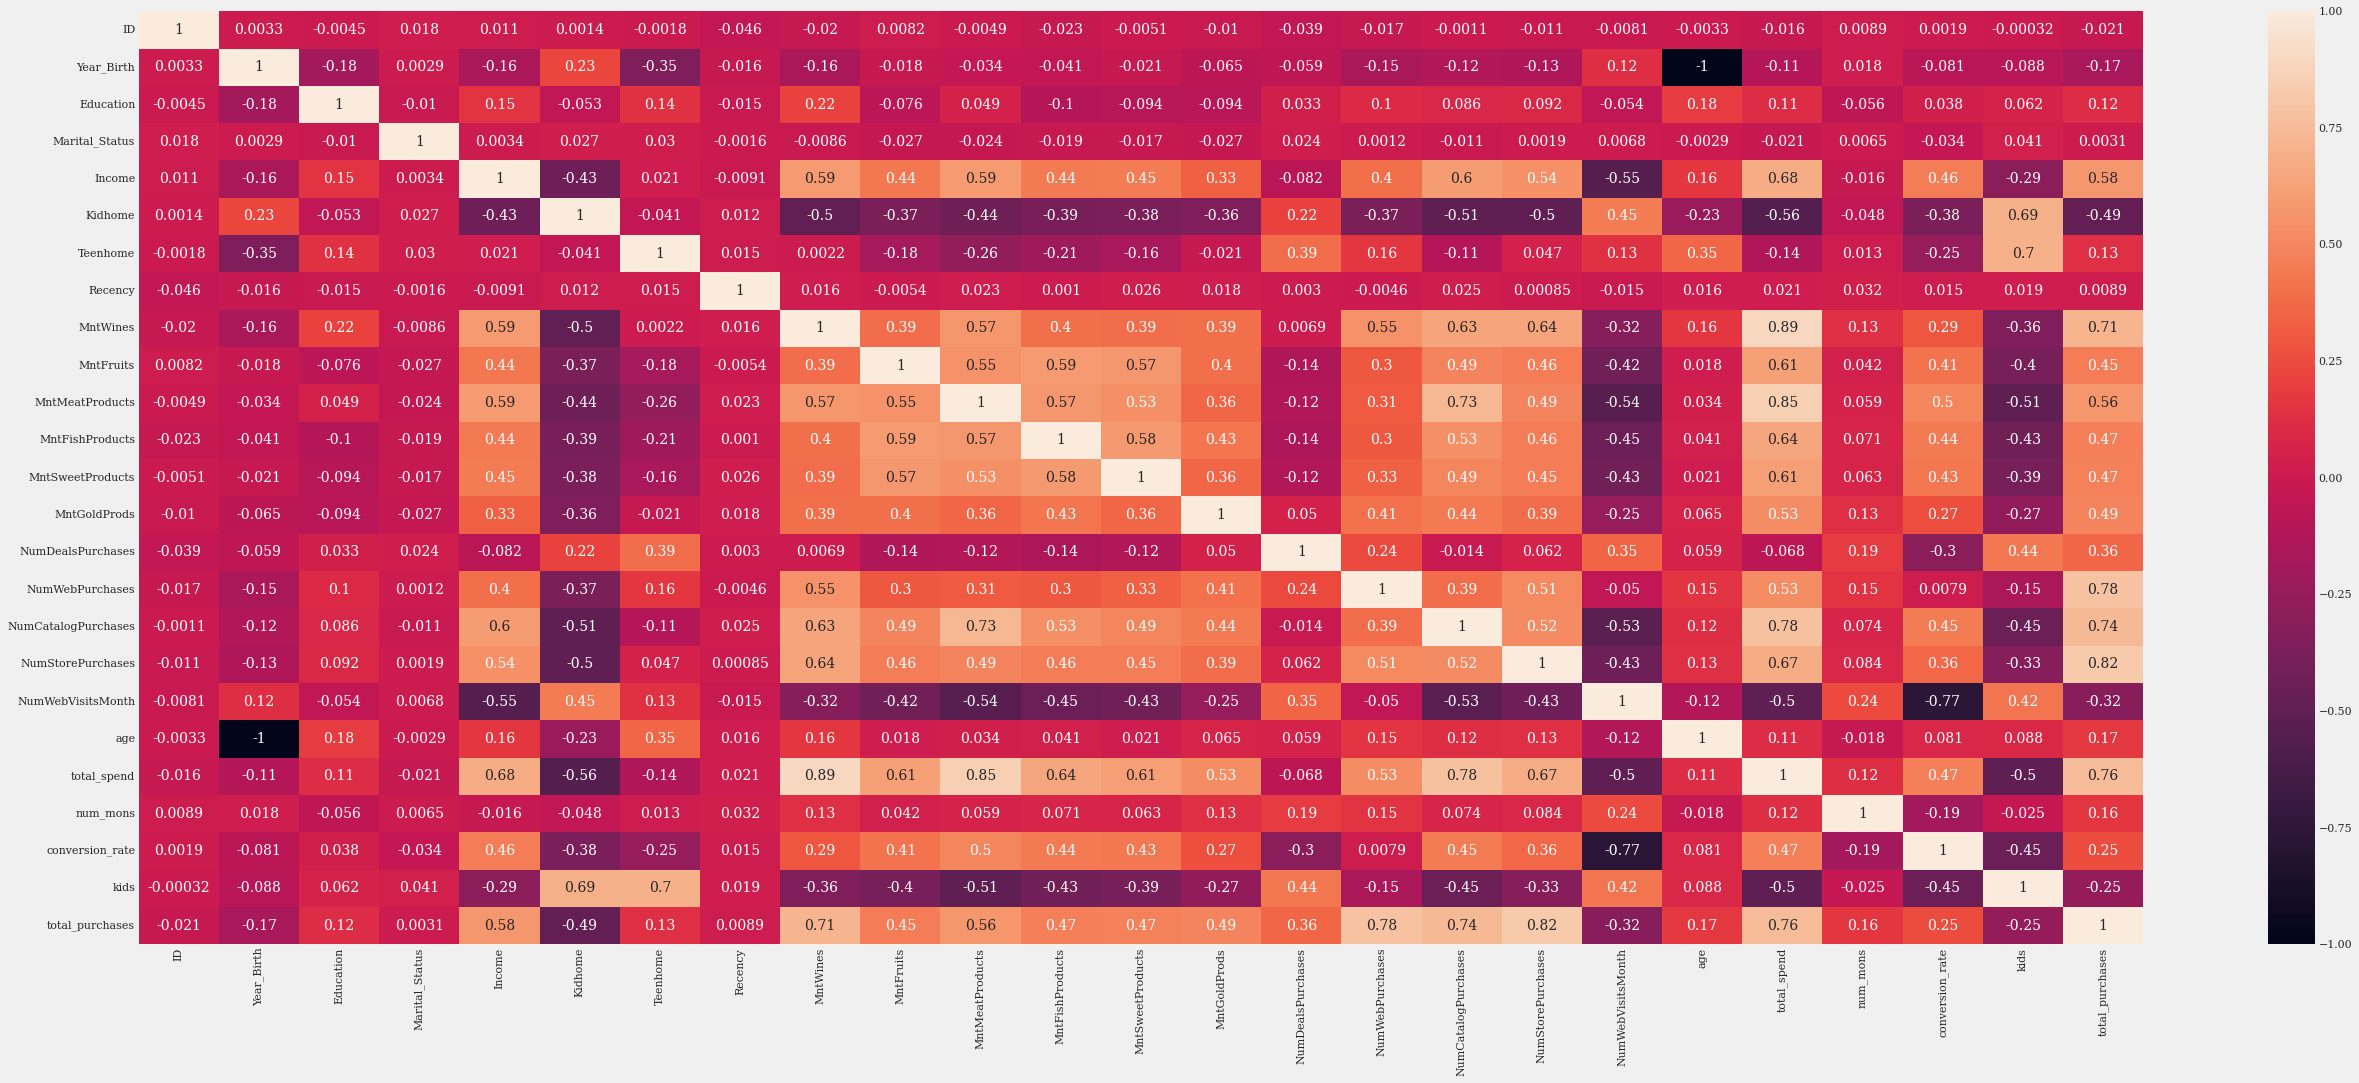

In [47]:
# correlation between features
data.drop(['num_days'],axis=1, inplace=True)
plt.figure(figsize=(40,16))
sns.heatmap(data.corr(), annot=True,)

<Figure size 432x288 with 0 Axes>

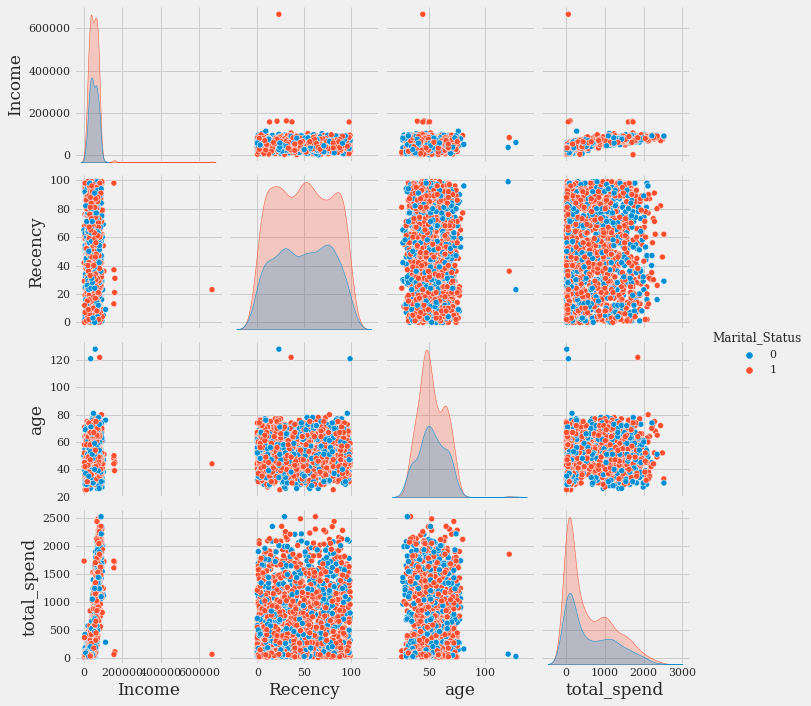

In [48]:
#### Analysing presence of outliers #### 
# numerical features
to_plot = ["Income","Recency","age","total_spend","Marital_Status"]      

# setting up plot      
plt.figure()
sns.pairplot(data[to_plot], hue= "Marital_Status")

plt.show()

<AxesSubplot:xlabel='Marital_Status', ylabel='total_spend'>

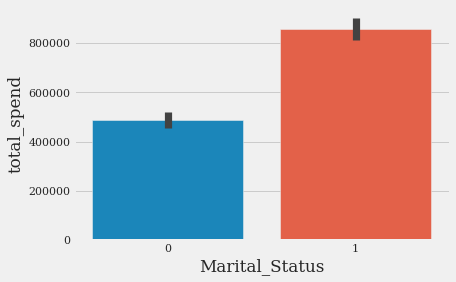

In [49]:
sns.barplot(x = 'Marital_Status',
            y = 'total_spend',
            estimator=sum,
            data = data)

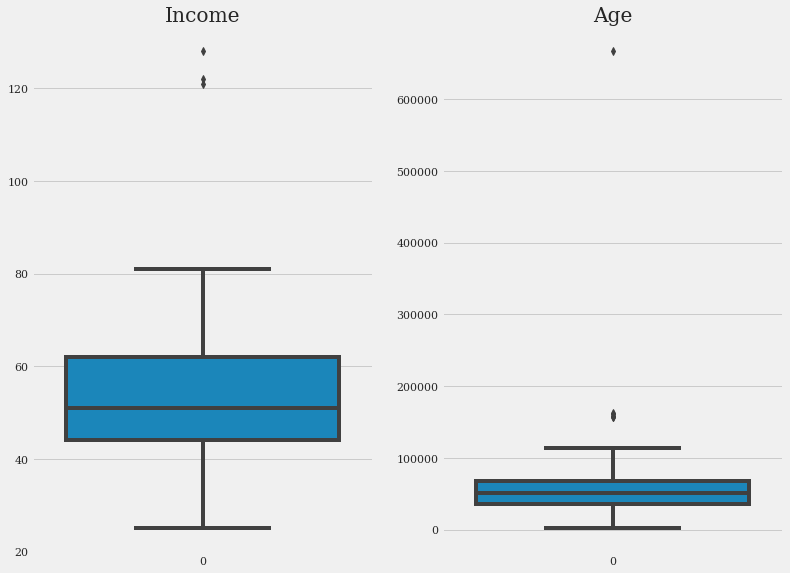

In [50]:
# box plot for outliers 
fig, axs = plt.subplots(ncols=2)

sns.boxplot(data=data['Income'],ax=axs[1]).set_title('Age')
sns.boxplot(data=data['age'], ax=axs[0]).set_title('Income')

fig.set_size_inches(12,9)
plt.show()     

In [51]:
# handle outliers in the above features
data = data[(data["age"]<95)]
data = data[(data["Income"]<600000)]
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,today,num_mons,conversion_rate,kids,total_purchases
0,5524,1957,3,0,58138.0,0,0,2012-04-09,58,635,...,10,4,7,64,1617,2022-04-06 13:38:29.757901,10.0,0.43,0,25
1,2174,1954,3,0,46344.0,1,1,2014-08-03,38,11,...,1,2,5,67,27,2022-04-06 13:38:29.757901,8.0,0.60,2,6
2,4141,1965,3,1,71613.0,0,0,2013-08-21,26,426,...,2,10,4,56,776,2022-04-06 13:38:29.757901,9.0,0.75,0,21
3,6182,1984,3,1,26646.0,1,0,2014-10-02,26,11,...,0,4,6,37,53,2022-04-06 13:38:29.757901,8.0,0.50,1,8
4,5324,1981,5,1,58293.0,1,0,2014-01-19,94,173,...,3,6,5,40,422,2022-04-06 13:38:29.757901,8.0,0.60,1,19


# Dimension Reduction and Customer Segmentation

## Scale data

In [52]:
df = data.copy()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age',
       'total_spend', 'today', 'num_mons', 'conversion_rate', 'kids',
       'total_purchases'],
      dtype='object')

In [53]:
# drop unnecessary columns
df.drop(['ID','Dt_Customer','Year_Birth','Kidhome',
             'Teenhome','today'], 
             axis=1, inplace=True)

df.head(4)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_mons,conversion_rate,kids,total_purchases
0,3,0,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,64,1617,10.0,0.43,0,25
1,3,0,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,67,27,8.0,0.60,2,6
2,3,1,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,56,776,9.0,0.75,0,21
3,3,1,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,37,53,8.0,0.50,1,8


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   int64  
 1   Marital_Status       2208 non-null   int64  
 2   Income               2208 non-null   float64
 3   Recency              2208 non-null   int64  
 4   MntWines             2208 non-null   int64  
 5   MntFruits            2208 non-null   int64  
 6   MntMeatProducts      2208 non-null   int64  
 7   MntFishProducts      2208 non-null   int64  
 8   MntSweetProducts     2208 non-null   int64  
 9   MntGoldProds         2208 non-null   int64  
 10  NumDealsPurchases    2208 non-null   int64  
 11  NumWebPurchases      2208 non-null   int64  
 12  NumCatalogPurchases  2208 non-null   int64  
 13  NumStorePurchases    2208 non-null   int64  
 14  NumWebVisitsMonth    2208 non-null   int64  
 15  age                  2208 non-null   i

In [55]:
# convert to interger column type
df['Income'] = df['Income'].astype(np.int64)
df['conversion_rate'] = df['conversion_rate'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   int64  
 1   Marital_Status       2208 non-null   int64  
 2   Income               2208 non-null   int64  
 3   Recency              2208 non-null   int64  
 4   MntWines             2208 non-null   int64  
 5   MntFruits            2208 non-null   int64  
 6   MntMeatProducts      2208 non-null   int64  
 7   MntFishProducts      2208 non-null   int64  
 8   MntSweetProducts     2208 non-null   int64  
 9   MntGoldProds         2208 non-null   int64  
 10  NumDealsPurchases    2208 non-null   int64  
 11  NumWebPurchases      2208 non-null   int64  
 12  NumCatalogPurchases  2208 non-null   int64  
 13  NumStorePurchases    2208 non-null   int64  
 14  NumWebVisitsMonth    2208 non-null   int64  
 15  age                  2208 non-null   i

In [56]:
# normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaled_df = scaler.fit_transform(df)
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled_df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_mons,conversion_rate,kids,total_purchases
0,-0.458673,-1.351719,0.292925,0.311060,0.975863,1.550053,1.688262,2.451041,1.481762,0.850833,...,1.425749,2.501580,-0.560167,0.698394,1.018743,1.674434,1.683687,-0.476262,-1.266516,1.317746
1,-0.458673,-1.351719,-0.261644,-0.380080,-0.874099,-0.638273,-0.719275,-0.651903,-0.634855,-0.734941,...,-1.130379,-0.572908,-1.176741,-0.132230,1.275141,-0.965102,-1.018043,-0.476262,1.403143,-1.165726
2,-0.458673,0.739799,0.926537,-0.794765,0.356244,0.569079,-0.179808,1.337632,-0.148276,-0.038747,...,1.425749,-0.231298,1.289556,-0.547542,0.335013,0.278302,0.332822,-0.476262,-1.266516,0.794910
3,-0.458673,0.739799,-1.187869,-0.794765,-0.874099,-0.562814,-0.656857,-0.505882,-0.586197,-0.754280,...,-0.765218,-0.914518,-0.560167,0.283082,-1.288844,-0.921940,-1.018043,-0.476262,0.068313,-0.904308
4,1.532969,0.739799,0.300213,1.555113,-0.393821,0.418160,-0.219934,0.151212,-0.002303,-0.560893,...,0.330266,0.110311,0.056408,-0.132230,-1.032445,-0.309368,-1.018043,-0.476262,0.068313,0.533492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,-0.458673,0.739799,0.437986,-0.103624,1.195249,0.418160,0.065404,0.078202,2.211629,3.925687,...,1.790911,0.110311,-0.560167,-0.132230,0.164081,1.216250,0.332822,-0.476262,0.068313,0.402783
2204,1.532969,0.739799,0.569222,0.241946,0.296950,-0.663427,-0.612273,-0.688408,-0.659184,-0.696263,...,1.425749,-0.231298,-0.251880,0.698394,1.958871,-0.272846,-1.018043,-0.476262,2.737973,0.925619
2205,-0.458673,-1.351719,0.238522,1.451442,1.785221,0.543926,0.221448,-0.104324,-0.367237,-0.386844,...,-0.765218,0.110311,2.214418,0.283082,-1.032445,1.050242,-1.018043,-0.476262,-1.266516,0.533492
2206,0.537148,0.739799,0.815190,-1.416791,0.362173,0.091169,0.208073,0.771801,0.070684,0.328688,...,0.695427,0.793531,1.289556,-0.962855,1.104209,0.389528,-1.018043,0.781617,0.068313,1.056328


## Principle Component Analysis & Segmentation

### PCA

In [57]:
from sklearn import decomposition as dcp

# fit PCA transform 
pca=dcp.PCA(n_components=17)
pca.fit(scaled_df)

PCA(n_components=17)

In [58]:
# get the explained variance of each component
pca.explained_variance_

array([8.02792827, 2.37801158, 1.4859293 , 1.01353684, 1.00919878,
       0.97775114, 0.8525707 , 0.75685785, 0.68001275, 0.62121482,
       0.57397445, 0.47629539, 0.43666174, 0.39502966, 0.36228898,
       0.33605063, 0.25829318])

In [59]:
# get the explained variance ratio (explained variance per variable / total explained variance)
pca.explained_variance_ratio_

array([0.38210916, 0.11318736, 0.07072649, 0.0482418 , 0.04803532,
       0.04653849, 0.04058022, 0.03602453, 0.03236689, 0.02956826,
       0.02731974, 0.02267046, 0.020784  , 0.01880242, 0.01724404,
       0.01599516, 0.0122941 ])

In [60]:
# calculate the cumulative sum of the explained variance ratio 
cum_sum = np.cumsum(pca.explained_variance_ratio_)
cum_sum

array([0.38210916, 0.49529652, 0.56602302, 0.61426482, 0.66230014,
       0.70883863, 0.74941885, 0.78544337, 0.81781027, 0.84737853,
       0.87469826, 0.89736873, 0.91815272, 0.93695514, 0.95419918,
       0.97019435, 0.98248845])

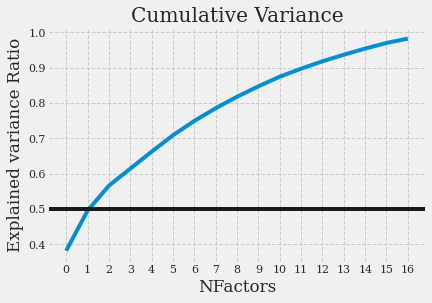

In [61]:
# plot the variance ratio captured per components
ax = plt.subplot(111)
plt.plot(cum_sum)
plt.xlabel("NFactors")
plt.ylabel("Explained variance Ratio")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(range(0,17))
plt.grid(ls='--')
plt.title('Cumulative Variance')
plt.axhline(y=0.5,c='k')
plt.show()

2 components explain 51% of the data variance. However, to better segment customers and understand customers' behavior, we choose 3 factors as to grasp more information (58%).

In [62]:
# fit PCA
pca = dcp.PCA(n_components=3)
pca_loadings = pca.fit(scaled_df)
pca_loadings = pd.DataFrame(pca_loadings.components_, columns=scaled_df.columns)
pca_loadings.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_mons,conversion_rate,kids,total_purchases
0,0.026799,-0.009112,0.304189,0.005913,0.274571,0.242589,0.288711,0.252035,0.243270,0.201206,...,0.198012,0.292600,0.267861,-0.226079,0.052595,0.334053,0.026550,0.200282,-0.197127,0.288235
1,0.121550,0.032834,-0.002401,0.006191,0.178764,-0.102658,-0.093161,-0.112422,-0.090816,0.097454,...,0.377067,0.018620,0.150068,0.329352,0.139464,0.050580,0.255223,-0.348674,0.276371,0.327943
2,-0.575453,-0.014799,-0.202431,0.020745,-0.128946,0.204389,0.016019,0.214078,0.202424,0.230741,...,0.032436,-0.043039,-0.058215,0.234251,-0.428775,0.000341,0.371129,-0.140182,-0.154804,-0.018878


<AxesSubplot:>

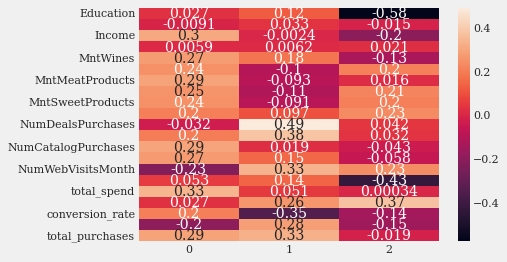

In [63]:
sns.heatmap(pca_loadings.T, annot=True)

### K-Means clustering with PCA results

In [64]:
from sklearn.cluster import KMeans
import graphviz as gp
from IPython.display import SVG, display
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Set theme for plots
sns.set_theme(style='darkgrid')
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.family':'serif'})

In [65]:
# fit PCA transform 
pca_data = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(pca_data)
pca_data

,0,1,2
0,4.258498,1.236122,2.048315
1,-2.812498,-0.765611,-1.175319
2,1.944439,0.276348,0.417029
3,-2.773015,-1.011531,0.416583
4,-0.052845,0.762507,-0.745827
...,...,...,...
2203,2.613004,1.256958,1.614731
2204,-0.994315,3.590246,-2.882146
2205,1.583664,-0.398266,0.156526
2206,2.253996,0.130978,-1.593451


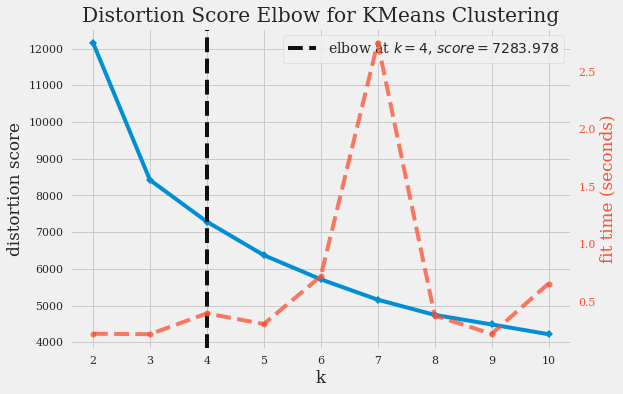

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
# plot 'elbow' for k means 
model = KMeans()
visualisation = KElbowVisualizer(model, k=10)

visualisation.fit(pca_data)        # fit the data to the visualisation
visualisation.show()          # finalize and render the figure

Based on the 'elbow' method, we classify customers into 4 segmentations.

### Hierachical Clustering with PCA results

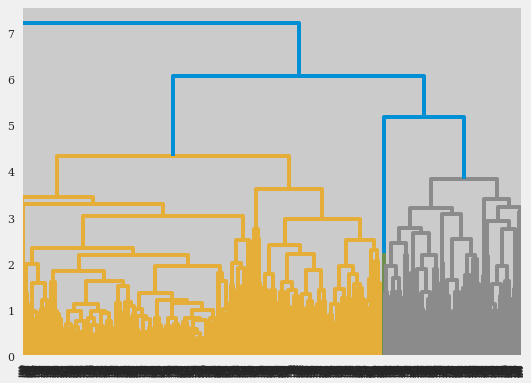

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierachical Clustering
# use Average Dendrogram method
Z = linkage(pca_data, method='average')
plt.figure(figsize=(8,6))
dendrogram(Z)
plt.show()

The graph looks messy when it tries slicing customers into smaller groups.

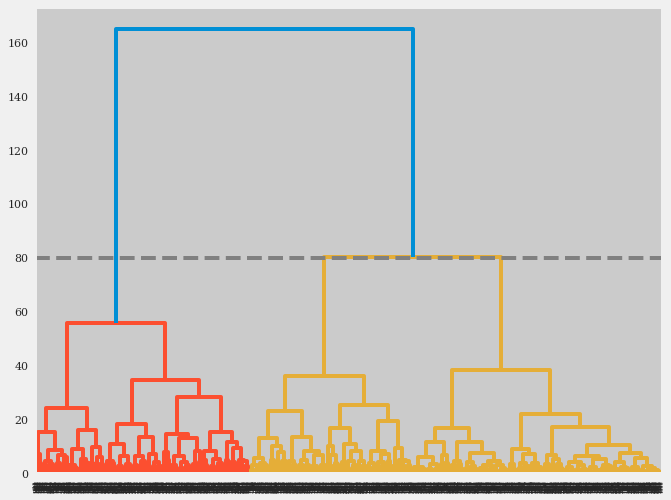

In [68]:
# Hierachical Clustering
# use Ward Dendrogram method
Z = linkage(pca_data, method='ward')
plt.figure(figsize=(10,8))
dendrogram(Z)
plt.plot([np.min(Z), np.max(Z)*5],[80,80], ls='--', color='grey')
plt.show()

The Ward Dendogram method presents a clear distance to cut the clusters. Based on the largest distance as a criteria, we have three clusters. When considering the business perspective, for the interpretation of the customer behavior analysis, three-segments is the optimal solution.

Now, we try Factor Analysis to reduce dimensions, and then segmentation.

## Factor Analysis and Segmentation

### Adequacy Test

#### Bartlett’s Test

In [69]:
#pip install factor_analyzer

In [70]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Set theme for plots
sns.set_theme(style='darkgrid')
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.family':'serif'})

In [71]:
scaled_df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_mons,conversion_rate,kids,total_purchases
0,-0.458673,-1.351719,0.292925,0.311060,0.975863,1.550053,1.688262,2.451041,1.481762,0.850833,...,1.425749,2.501580,-0.560167,0.698394,1.018743,1.674434,1.683687,-0.476262,-1.266516,1.317746
1,-0.458673,-1.351719,-0.261644,-0.380080,-0.874099,-0.638273,-0.719275,-0.651903,-0.634855,-0.734941,...,-1.130379,-0.572908,-1.176741,-0.132230,1.275141,-0.965102,-1.018043,-0.476262,1.403143,-1.165726
2,-0.458673,0.739799,0.926537,-0.794765,0.356244,0.569079,-0.179808,1.337632,-0.148276,-0.038747,...,1.425749,-0.231298,1.289556,-0.547542,0.335013,0.278302,0.332822,-0.476262,-1.266516,0.794910
3,-0.458673,0.739799,-1.187869,-0.794765,-0.874099,-0.562814,-0.656857,-0.505882,-0.586197,-0.754280,...,-0.765218,-0.914518,-0.560167,0.283082,-1.288844,-0.921940,-1.018043,-0.476262,0.068313,-0.904308
4,1.532969,0.739799,0.300213,1.555113,-0.393821,0.418160,-0.219934,0.151212,-0.002303,-0.560893,...,0.330266,0.110311,0.056408,-0.132230,-1.032445,-0.309368,-1.018043,-0.476262,0.068313,0.533492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,-0.458673,0.739799,0.437986,-0.103624,1.195249,0.418160,0.065404,0.078202,2.211629,3.925687,...,1.790911,0.110311,-0.560167,-0.132230,0.164081,1.216250,0.332822,-0.476262,0.068313,0.402783
2204,1.532969,0.739799,0.569222,0.241946,0.296950,-0.663427,-0.612273,-0.688408,-0.659184,-0.696263,...,1.425749,-0.231298,-0.251880,0.698394,1.958871,-0.272846,-1.018043,-0.476262,2.737973,0.925619
2205,-0.458673,-1.351719,0.238522,1.451442,1.785221,0.543926,0.221448,-0.104324,-0.367237,-0.386844,...,-0.765218,0.110311,2.214418,0.283082,-1.032445,1.050242,-1.018043,-0.476262,-1.266516,0.533492
2206,0.537148,0.739799,0.815190,-1.416791,0.362173,0.091169,0.208073,0.771801,0.070684,0.328688,...,0.695427,0.793531,1.289556,-0.962855,1.104209,0.389528,-1.018043,0.781617,0.068313,1.056328


In [72]:
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
chi_square_value, p_value 

/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

p-value is significant.

#### Kaiser-Meyer-Olkin (KMO) Test

KMO measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable.

In [73]:
from factor_analyzer.factor_analyzer import calculate_kmo

# compute KMO
kmo_all, kmo_model = calculate_kmo(scaled_df)
kmo_model

/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8610664959106625

The overall KMO for our data is 0.86, which is excellent. This value indicates that we can proceed with factor analysis.

### Choose the number of factors:

#### Rule 1: Select factors which have eigenvalues larger than 1. 

In [74]:
# create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(scaled_df)

# get the eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([8.02429244e+00, 2.37693458e+00, 1.48525632e+00, 1.01307781e+00,
       1.00874171e+00, 9.77308318e-01, 8.52184570e-01, 7.56515074e-01,
       6.79704771e-01, 6.20933473e-01, 5.73714494e-01, 4.76079675e-01,
       4.36463976e-01, 3.94850757e-01, 3.62124897e-01, 3.35898433e-01,
       2.58176199e-01, 2.06909927e-01, 1.60832576e-01, 1.72551724e-16,
       9.44308832e-17])

In [75]:
# check if the number of eigenvalues is the same as the number of variables
print("The total number of eigenvalues is",len(eigen_values))

The total number of eigenvalues is 21


In [76]:
# number of eigenvalues is greater than 1
(eigen_values > 1).sum()

5

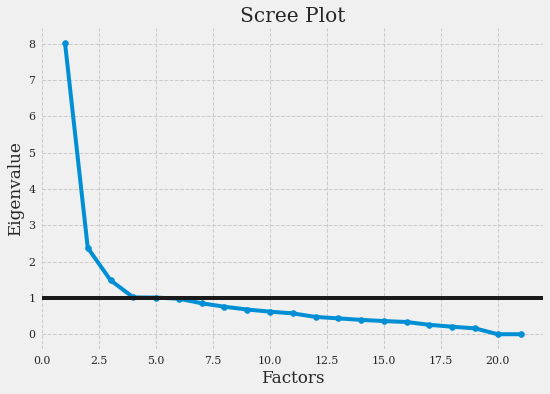

In [77]:
# create scree plot 
ax = plt.subplot(111)
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(ls='--')
plt.axhline(y=1,c='k')
plt.show()

Based on rule 1, we will choose 5 factors.

#### Rule 2: Select the number of factors with the cumulative eigenvalues accounting for the maximum of total variance.

##### None rotation

In [78]:
# fit the factor analysis 
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(scaled_df)

# get the variance, variance ratio, and cumulative variance
fa_variance = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
fa_variance = fa_variance.transpose()
fa_variance

,Variance,Proportional Var,Cumulative Var
0,7.977736,0.379892,0.379892
1,2.250712,0.107177,0.487069
2,1.128134,0.053721,0.540790
3,0.766809,0.036515,0.577304
4,0.661938,0.031521,0.608825
5,0.651126,0.031006,0.639831
6,0.446344,0.021254,0.661086
7,0.432324,0.020587,0.681673
8,0.393907,0.018757,0.700430
9,0.382909,0.018234,0.718664


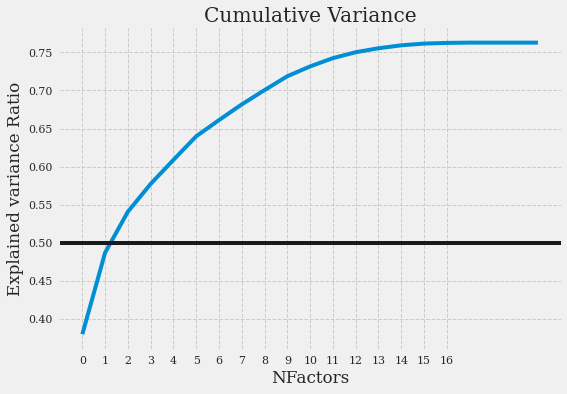

In [79]:
# plot the variance ratio captured per components
ax = plt.subplot(111)
plt.plot(fa_variance['Cumulative Var'])
plt.xlabel("NFactors")
plt.ylabel("Explained variance Ratio")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(range(0,17))
plt.grid(ls='--')
plt.title('Cumulative Variance')
plt.axhline(y=0.5,c='k')
plt.show()

2 factors are able to capture 50% of the data variance. We choose 3 to get more information from customers' behaviors.

##### "varimax" rotation

In [80]:
# fit the factor analysis with "varimax" rotation
faVarimax = FactorAnalyzer(n_factors=25, rotation="varimax")
faVarimax.fit(scaled_df)

# get the variance, variance ratio, and cumulative variance
faVarimax_variance = pd.DataFrame(faVarimax.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
faVarimax_variance = faVarimax_variance.transpose()
faVarimax_variance

,Variance,Proportional Var,Cumulative Var
0,2.211141,0.105292,0.105292
1,1.913193,0.091104,0.196397
2,1.436406,0.068400,0.264797
3,1.321125,0.062911,0.327708
4,1.230332,0.058587,0.386295
5,1.117154,0.053198,0.439493
6,1.068618,0.050887,0.490379
7,1.059373,0.050446,0.540826
8,1.047020,0.049858,0.590684
9,1.005328,0.047873,0.638557


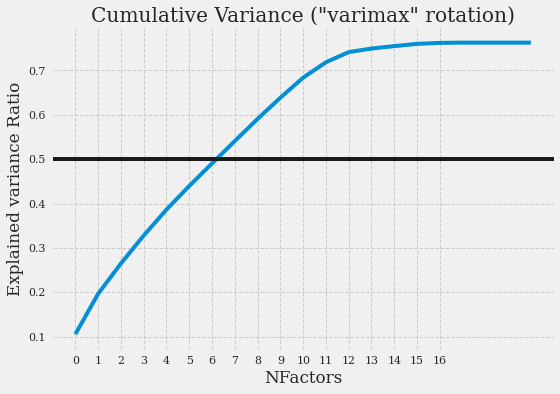

In [81]:
# plot the variance ratio captured per components
ax = plt.subplot(111)
plt.plot(faVarimax_variance['Cumulative Var'])
plt.xlabel("NFactors")
plt.ylabel("Explained variance Ratio")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(range(0,17))
plt.grid(ls='--')
plt.title('Cumulative Variance ("varimax" rotation)')
plt.axhline(y=0.5,c='k')
plt.show()

In our case, 6 factors are able to explain 53% of the total variance. This may be a result in an overlap in generating insights for customer segmentation. 

##### "promax" rotation

In [82]:
# fit the factor analysis
faPromax = FactorAnalyzer(n_factors=16, rotation='promax')
faPromax.fit(scaled_df)

# get the variance, variance ratio, and cumulative variance
faPromax_variance = pd.DataFrame(faPromax.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
faPromax_variance = faPromax_variance.transpose()
faPromax_variance

,Variance,Proportional Var,Cumulative Var
0,2.095756,0.099798,0.099798
1,1.821416,0.086734,0.186532
2,1.539987,0.073333,0.259865
3,1.441361,0.068636,0.328501
4,1.427179,0.067961,0.396462
5,1.375532,0.065502,0.461963
6,1.342971,0.063951,0.525914
7,1.061160,0.050531,0.576446
8,1.042689,0.049652,0.626098
9,0.989167,0.047103,0.673201


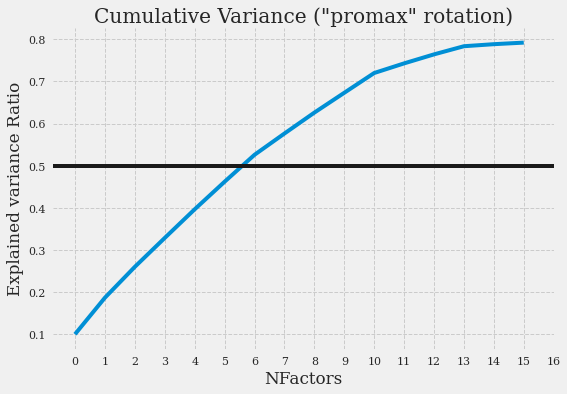

In [83]:
# plot the variance ratio captured per components
ax = plt.subplot(111)
plt.plot(faPromax_variance['Cumulative Var'])
plt.xlabel("NFactors")
plt.ylabel("Explained variance Ratio")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(range(0,17))
plt.grid(ls='--')
plt.title('Cumulative Variance ("promax" rotation)')
plt.axhline(y=0.5,c='k')
plt.show()

The result does not change significantly between varimax and promax. 

We choose None rotation as we want to keep the model plain but sill capture 50% of the data variance.

##### Compare PCA and FA

In [84]:
# fit the factor analysis 
fa = FactorAnalyzer(n_factors=3, rotation=None)
fa.fit(scaled_df)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [85]:
# create data
fa_loadings = fa.loadings_
fa_loadings = pd.DataFrame(fa_loadings.T, columns=scaled_df.columns)
fa_loadings

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_mons,conversion_rate,kids,total_purchases
0,0.071746,-0.022757,0.859625,0.014977,0.762705,0.658142,0.799551,0.689227,0.659438,0.533950,...,0.544232,0.810629,0.736021,-0.632614,0.136467,0.955891,0.068911,0.546530,-0.528226,0.834633
1,0.133292,0.032573,-0.021722,0.003607,0.252042,-0.146715,-0.148553,-0.167262,-0.130231,0.115035,...,0.531079,0.015037,0.206954,0.516745,0.140891,0.068908,0.284235,-0.501696,0.358356,0.547610
2,-0.446931,-0.015523,-0.273074,0.006838,-0.154086,0.258710,0.032242,0.284104,0.247025,0.213130,...,0.044182,-0.048748,-0.071679,0.299358,-0.285998,0.019032,0.265159,-0.145959,-0.174796,-0.043582


<AxesSubplot:title={'center':'Factor Analysis'}>

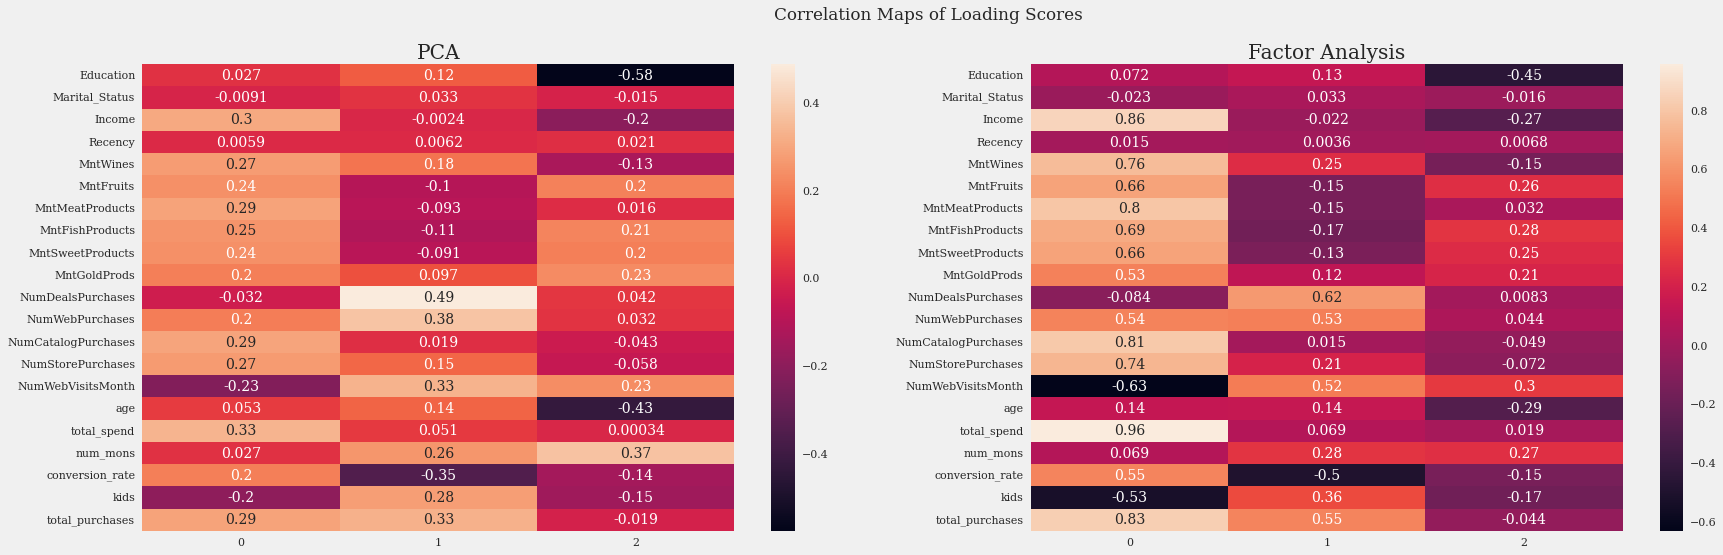

In [86]:
# plot correlation maps
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(26,8))
fig.suptitle('Correlation Maps of Loading Scores')
axes[0].set_title('PCA')
sns.heatmap(ax=axes[0], data=pca_loadings.transpose(), annot=True)
axes[1].set_title('Factor Analysis')
sns.heatmap(ax=axes[1], data=fa_loadings.transpose(), annot=True)

The goal PCA is to regroup variables in such a way that the first (newly created) component contains a maximum of variation, while Factor Analysis tries to find latent variables that make sense to us. 

PCA and FA share similar directions of correlations, however, FA’s loadings are higher, which are better at emphasising the differences in explaining behaviours at each component.

In the Factor Analysis heatmap:

Factor 1 has high factor loadings for Income, MntWines, MntFruits, MntMeatProducts, MntSweetProducts, MntGoldProds, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, totak_spend while scores are significantly low at Kids (Single and High Income Customers, The Best-buying Customer Segment).

Factor 2 has high factor loadings for NumDealsPurchases, NumWebVisitsMonth, kids but low for MntMeatProducts, Income, MntFishProducts, and conversion_rate (Promotions Hunting Customers).

Factor 3 has high factor loadings for Education, MntWines, Age. The Income feature shows positive but not significantly high. (Aging Customers, Wine Interests).

Now, we try cluster customers using K-Means and Hierachical Clustering to compare.

### K-Means Clustering with Factor Analysis Result

In [87]:
# create data for k-means
kmeans_df = fa.fit_transform(scaled_df)
kmeans_df = pd.DataFrame(kmeans_df)
kmeans_df

,0,1,2
0,0.129880,-2.412358,2.262156
1,-0.554668,0.607969,-0.863756
2,0.438080,-0.341243,0.092499
3,-1.023716,-1.064177,0.321315
4,0.030496,-0.135156,-0.343453
...,...,...,...
2203,1.171270,1.825917,0.821824
2204,-0.545628,1.368213,-1.548901
2205,1.342996,2.489844,-0.312203
2206,0.347296,-1.331271,-0.673795


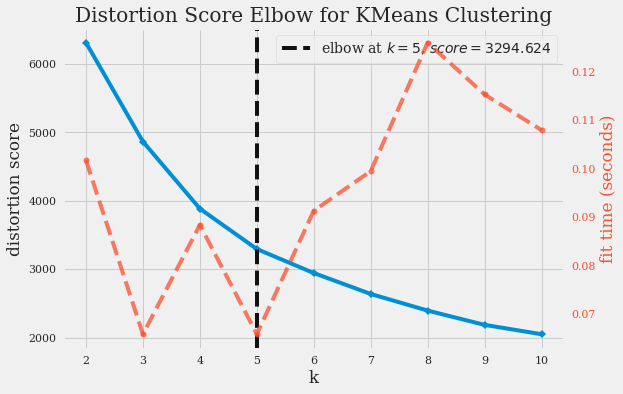

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
# plot 'elbow' for k means 
model = KMeans()
visualisation = KElbowVisualizer(model, k=10)

visualisation.fit(kmeans_df)        # Fit the data to the visualisation
visualisation.show()          # Finalize and render the figure

Using the "elbow" method, we choose 4-clusters as the optimal solution

In [89]:
# categorising each customer into different clusters (4) as according to plot
kmeans = KMeans(n_clusters=4, random_state=42).fit(kmeans_df)
pred = kmeans.predict(kmeans_df)

# Appending those cluster value into main dataframe (without standard-scalar)
kmeans_df['cluster'] = pred + 1
kmeans_df.head(5)

,0,1,2,cluster
0,0.129880,-2.412358,2.262156,1
1,-0.554668,0.607969,-0.863756,3
2,0.438080,-0.341243,0.092499,4
3,-1.023716,-1.064177,0.321315,1
4,0.030496,-0.135156,-0.343453,3


#### Visualise customer behaviors in each segment

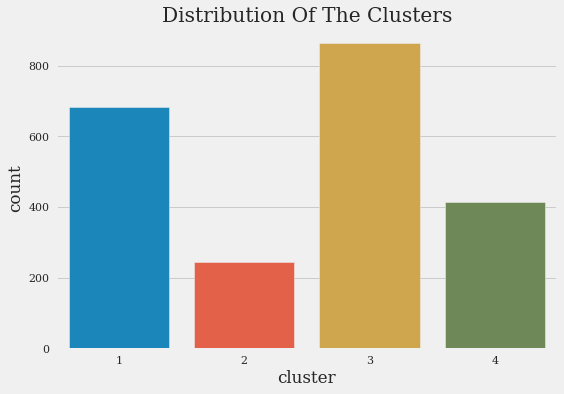

In [90]:
# plot the population in each segment
sns.countplot(x=kmeans_df["cluster"]).set_title("Distribution Of The Clusters")
plt.show()

In [91]:
# add labels to data
kmeans_data = data.copy()
kmeans_data['cluster'] = kmeans.labels_

# drop unnecssary data
kmeans_data.drop(['ID','Dt_Customer','Year_Birth','Kidhome',
                  'Teenhome','today'], axis=1, inplace=True)
kmeans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2208 non-null   int64  
 1   Marital_Status       2208 non-null   int64  
 2   Income               2208 non-null   float64
 3   Recency              2208 non-null   int64  
 4   MntWines             2208 non-null   int64  
 5   MntFruits            2208 non-null   int64  
 6   MntMeatProducts      2208 non-null   int64  
 7   MntFishProducts      2208 non-null   int64  
 8   MntSweetProducts     2208 non-null   int64  
 9   MntGoldProds         2208 non-null   int64  
 10  NumDealsPurchases    2208 non-null   int64  
 11  NumWebPurchases      2208 non-null   int64  
 12  NumCatalogPurchases  2208 non-null   int64  
 13  NumStorePurchases    2208 non-null   int64  
 14  NumWebVisitsMonth    2208 non-null   int64  
 15  age                  2208 non-null   i

In [92]:
# convert to interger column type
kmeans_data['Income'] = kmeans_data['Income'].astype(np.int64)
kmeans_data['num_mons'] = kmeans_data['num_mons'].astype(np.int64)
kmeans_data['conversion_rate'] = kmeans_data['conversion_rate'].astype(np.int64)
kmeans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2208 non-null   int64
 1   Marital_Status       2208 non-null   int64
 2   Income               2208 non-null   int64
 3   Recency              2208 non-null   int64
 4   MntWines             2208 non-null   int64
 5   MntFruits            2208 non-null   int64
 6   MntMeatProducts      2208 non-null   int64
 7   MntFishProducts      2208 non-null   int64
 8   MntSweetProducts     2208 non-null   int64
 9   MntGoldProds         2208 non-null   int64
 10  NumDealsPurchases    2208 non-null   int64
 11  NumWebPurchases      2208 non-null   int64
 12  NumCatalogPurchases  2208 non-null   int64
 13  NumStorePurchases    2208 non-null   int64
 14  NumWebVisitsMonth    2208 non-null   int64
 15  age                  2208 non-null   int64
 16  total_spend          220

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


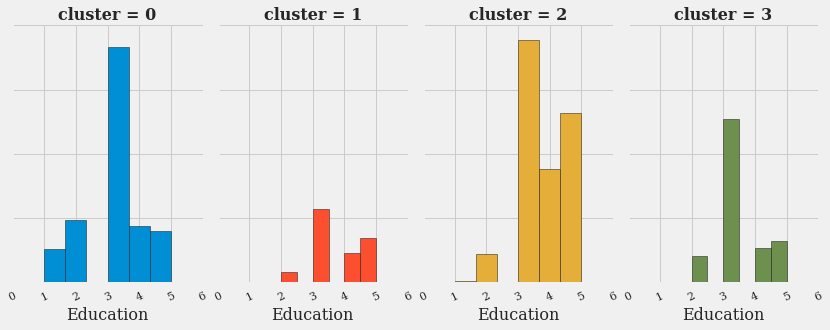

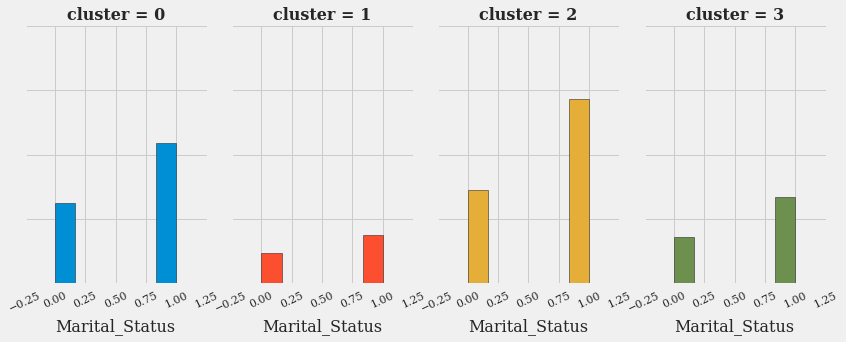

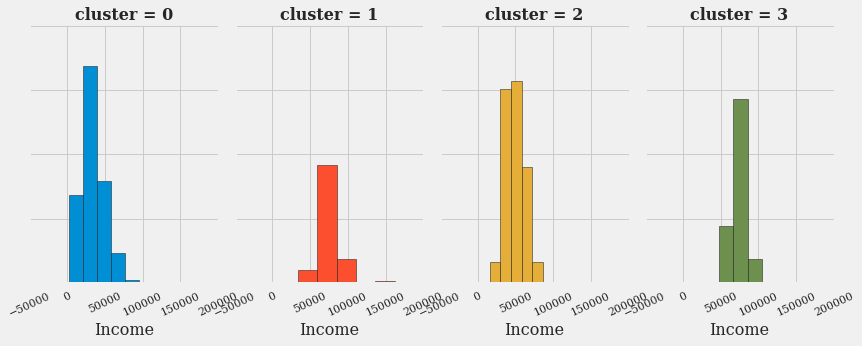

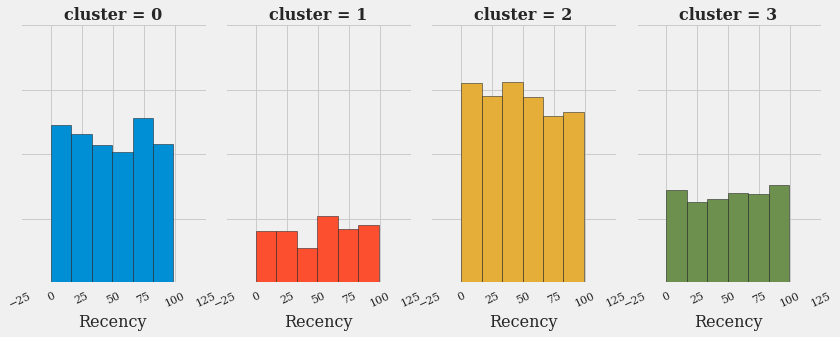

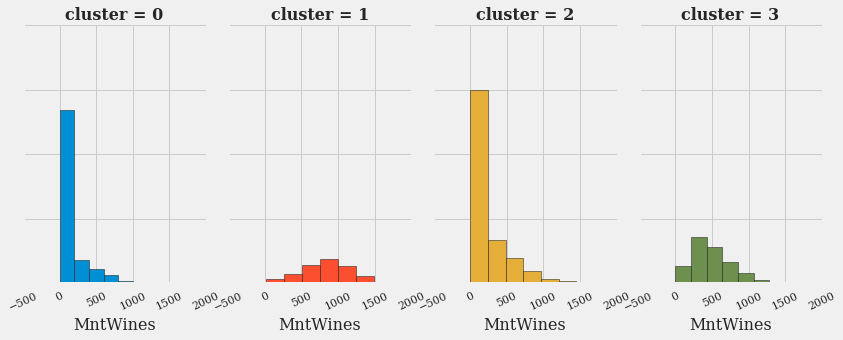

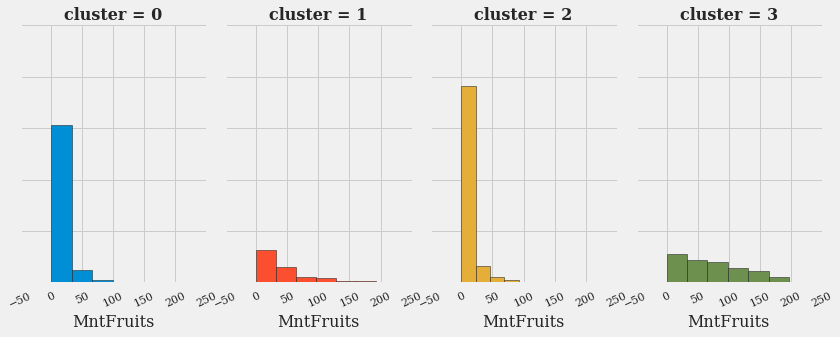

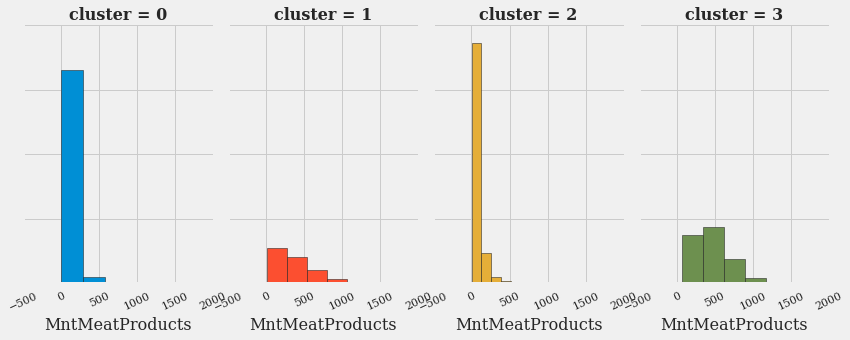

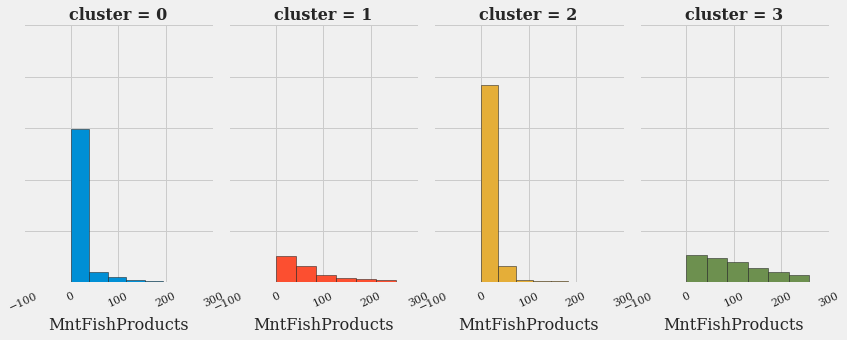

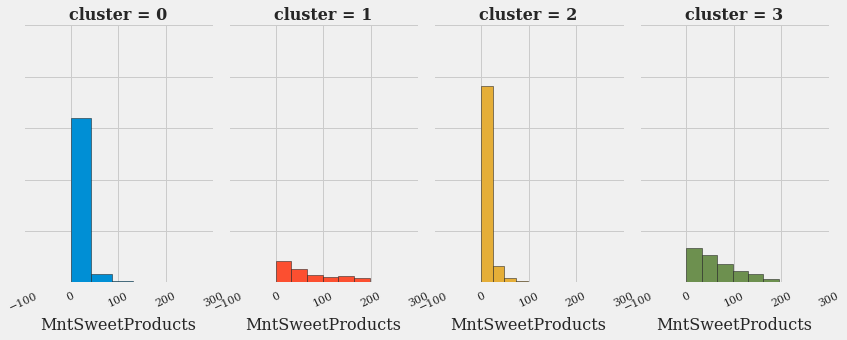

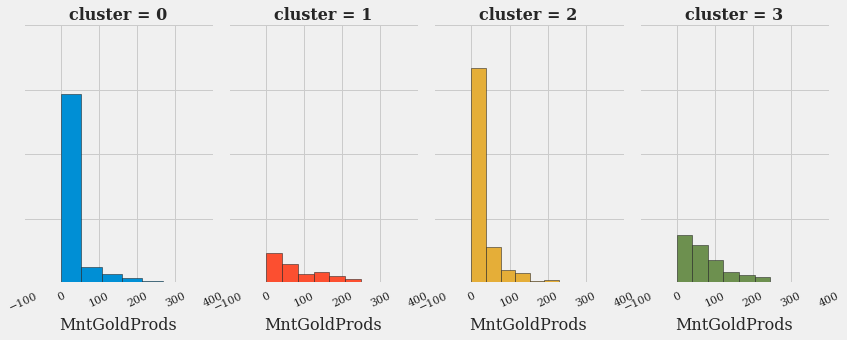

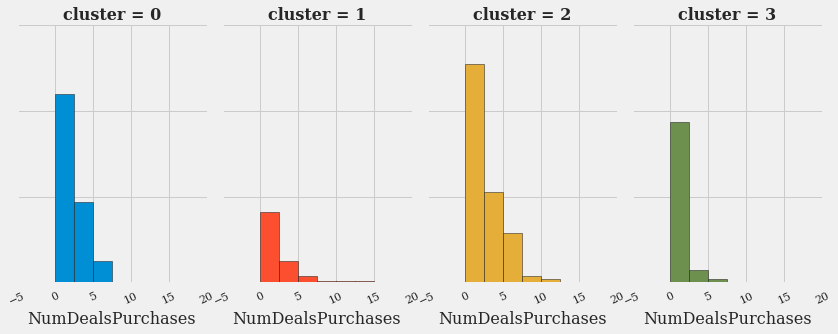

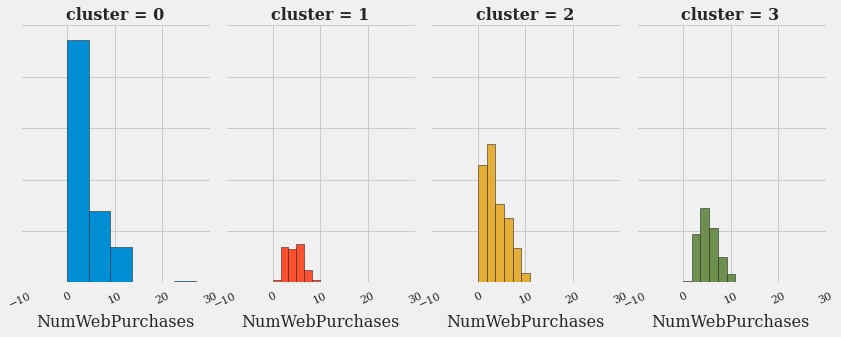

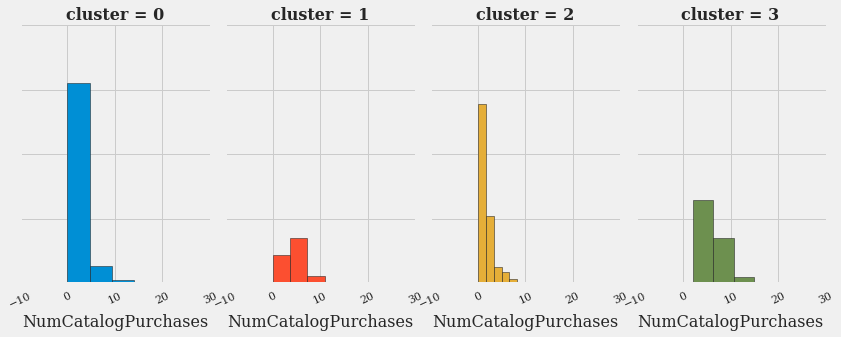

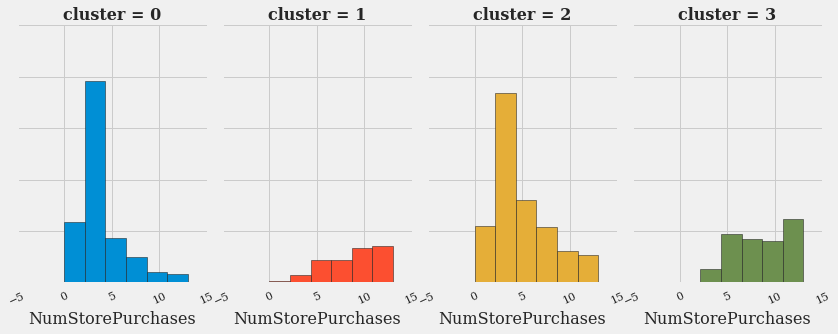

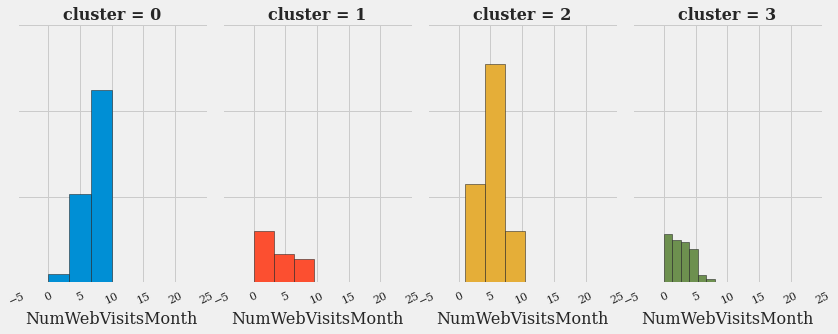

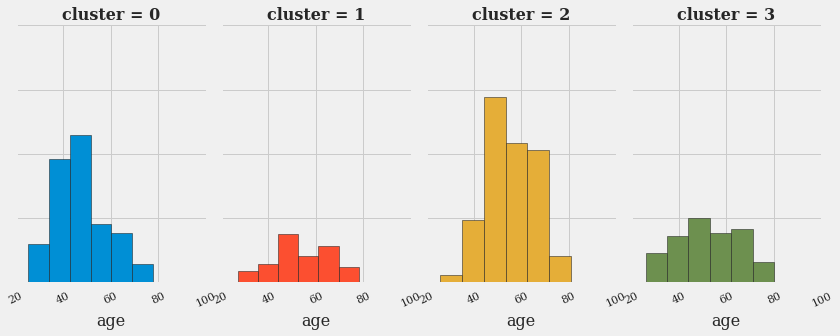

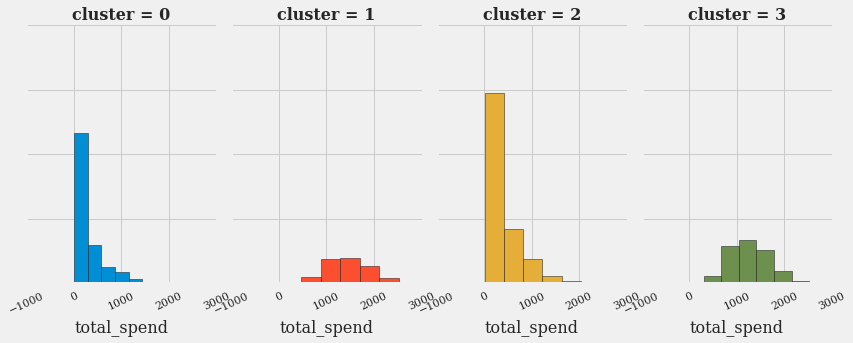

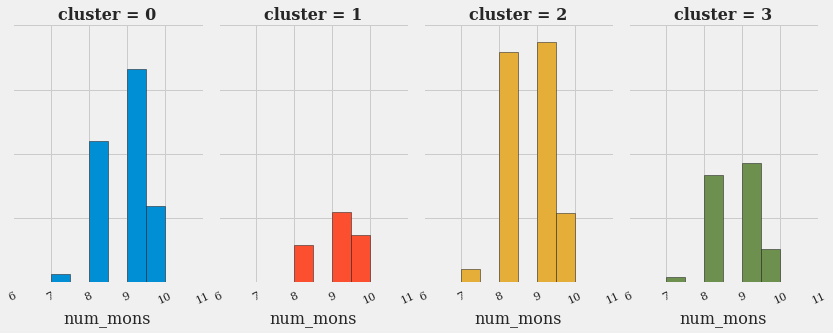

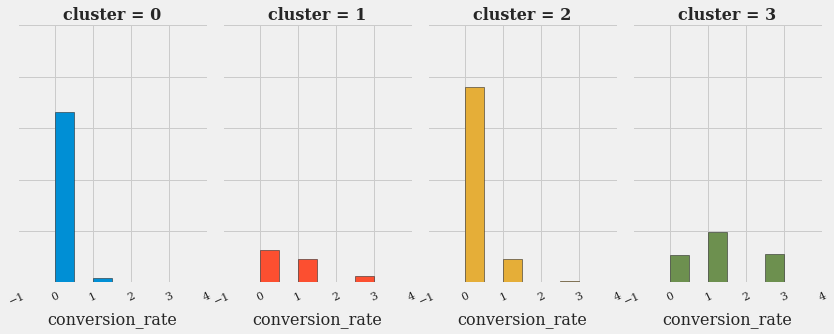

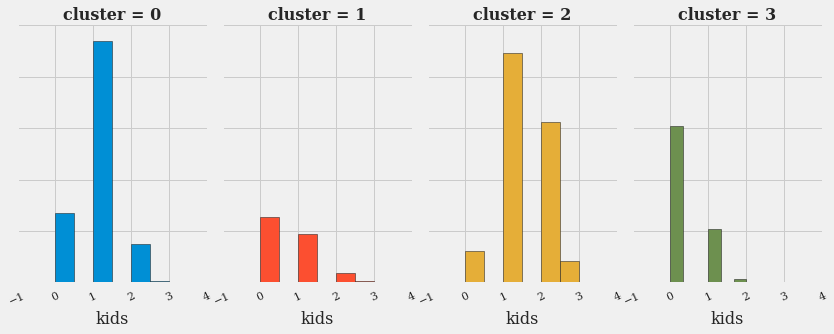

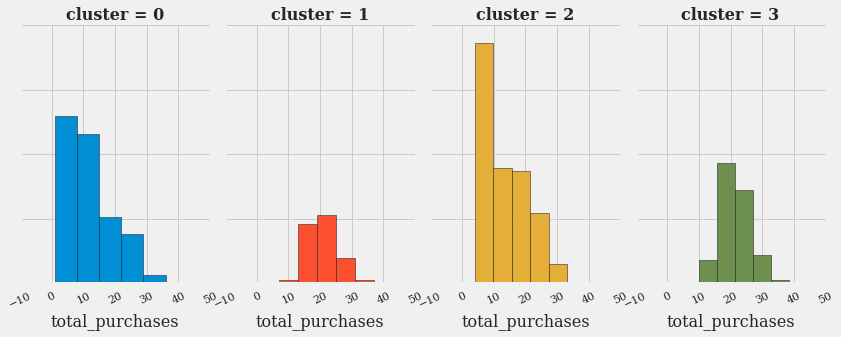

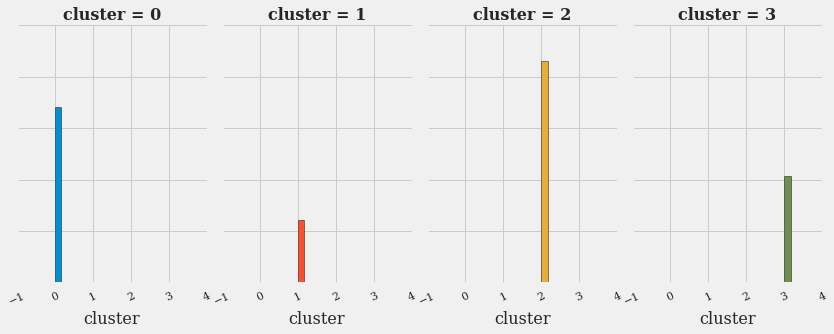

In [93]:
# distribution of variables for each clusters
for i in kmeans_data:
    diag = sns.FacetGrid(kmeans_data, col = "cluster", hue = "cluster")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25)
    diag.set_yticklabels()
    diag.set_xlabels(size=16)
    diag.set_titles(size=16, fontweight="bold")
    diag.fig.set_figheight(6)

#### Insights of K-Means method

- Creation of 4 clusters to help segment and identify different types of customers 

***Cluster 1***

- These customers prefer store purchases over web. 
- They however, have a tendency to browse/visit the website. This could mean they either use websites to research and find what they want to buy or simply that the online strategy of the shop is struggling to convert them into customers. 
- Lower income range 
- Often buy 'deals'
- Hence, are on a low-spending category
- Are parents


***Cluster 2***

- These customers prefer catalog purchases, having low web visit numbers for example
- Preferred products include wine, sweets & gold 
- Does not tend to buy on deals 
- High spend value & total purcharse
- Mostly don't have children. 

***Cluster 3***

- Parents in the middle of the age range 
- Often buys online and looks for 'deals'
- Conscious of their spending with total order value being low 
- However, often shops, according total purchase numbers

***Cluster 4***

- The oldest group of customers
- Doesn't shop often and prefers going to stores
- Looks for deals 
- Higher spending habits (according to order values) and are parents 
- Preferred products include wine, sweets & gold 

Now, we try fit the hierachical clustering.

### Hierachical Clustering with Factor Analysis Results

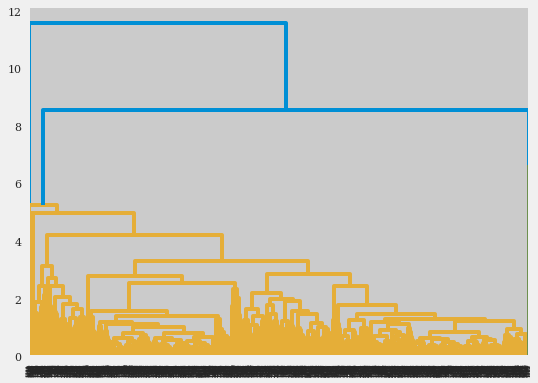

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# use "Average" Dendrogram method
Z = linkage(kmeans_df, method = 'average')
plt.figure(figsize=(8,6))
dendrogram(Z)
plt.show()

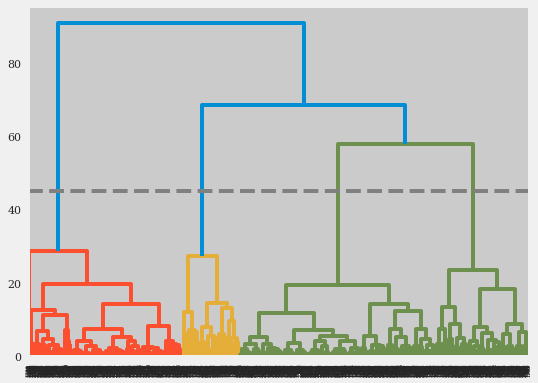

In [95]:
# use "Ward" Dendrogram method

Z = linkage(kmeans_df, method = 'ward')
plt.figure(figsize=(8,6))
plt.plot([np.min(Z), np.max(Z)*5],[45,45], ls='--', color='grey')
dendrogram(Z)
plt.show()

Applying max distance to slice the hierachy, we have 3 clusters. Now we visualise the population at each segment.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


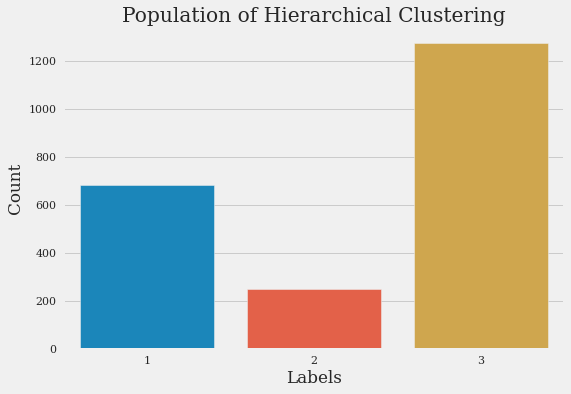

In [96]:
labels=fcluster(Z, 3, criterion='maxclust')
sns.countplot(labels)
plt.title("Population of Hierarchical Clustering")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

### Select K-Means

Clustering is rather a subjective statistical analysis and there can be more than one appropriate algorithm, hence we depend on the dataset at hand (i.e., customer buying pattern).

- With a large number of variables, k-means has proved computationally faster than hierarchical clustering
- Moreover, K-Means allows us to actively decide the number of clusters by iterating the inertia to minimise the within-clusters sum of squared, ensuring the number of clusters is the optimal solution
- Furthermore, the number of observations divided in each cluster using k-means is obviously more sensible

Comparably, considering the context and the input dataset, k-means clustering is an ideal choice for customer segmentation. 

#### K-Means Heatmap and SnakePlot
Heat map and snake plot to visual similarities and differences amongst clusters:

In [97]:
# fit the K-Means model
kmeans = KMeans(n_clusters = 4).fit(scaled_df)
# get the labels for each customer
len(kmeans.labels_)

2208

In [98]:
# inspect clusters
kmeans.cluster_centers_

array([[ 2.51351782e-01,  5.51313803e-02,  1.34899982e-02,
        -5.56626932e-02,  1.27518011e-01, -3.54989903e-01,
        -3.18878211e-01, -3.55277205e-01, -3.43671518e-01,
         1.22509572e-01,  1.07761522e+00,  7.07708220e-01,
        -1.34023738e-01,  1.95344228e-01,  4.80494835e-01,
         3.00137124e-01, -1.16005619e-01,  2.84360353e-01,
        -3.86010979e-01,  4.99289704e-01,  5.55764985e-01],
       [-1.49341553e-01,  1.67248929e-02, -8.15275244e-01,
         4.36212296e-03, -7.99431538e-01, -5.39373878e-01,
        -6.54206851e-01, -5.63107136e-01, -5.36811122e-01,
        -5.65961691e-01, -2.53058616e-01, -7.75769400e-01,
        -7.38601058e-01, -8.14050348e-01,  4.13375892e-01,
        -2.36966026e-01, -8.63264686e-01, -1.84382478e-01,
        -3.80201448e-01,  3.50707610e-01, -9.69055002e-01],
       [ 2.45538178e-02, -6.76505891e-02,  1.26937393e+00,
         5.88772789e-02,  8.27556921e-01,  1.07706573e+00,
         1.64731188e+00,  1.17658824e+00,  1.05127657e

In [99]:
kmeans_df

,0,1,2,cluster
0,0.129880,-2.412358,2.262156,1
1,-0.554668,0.607969,-0.863756,3
2,0.438080,-0.341243,0.092499,4
3,-1.023716,-1.064177,0.321315,1
4,0.030496,-0.135156,-0.343453,3
...,...,...,...,...
2203,1.171270,1.825917,0.821824,2
2204,-0.545628,1.368213,-1.548901,3
2205,1.342996,2.489844,-0.312203,2
2206,0.347296,-1.331271,-0.673795,4


In [100]:
# add labels
data_snake = scaled_df.copy()
data_snake['label'] = kmeans.labels_
data_snake

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_mons,conversion_rate,kids,total_purchases,label
0,-0.458673,-1.351719,0.292925,0.311060,0.975863,1.550053,1.688262,2.451041,1.481762,0.850833,...,2.501580,-0.560167,0.698394,1.018743,1.674434,1.683687,-0.476262,-1.266516,1.317746,3
1,-0.458673,-1.351719,-0.261644,-0.380080,-0.874099,-0.638273,-0.719275,-0.651903,-0.634855,-0.734941,...,-0.572908,-1.176741,-0.132230,1.275141,-0.965102,-1.018043,-0.476262,1.403143,-1.165726,1
2,-0.458673,0.739799,0.926537,-0.794765,0.356244,0.569079,-0.179808,1.337632,-0.148276,-0.038747,...,-0.231298,1.289556,-0.547542,0.335013,0.278302,0.332822,-0.476262,-1.266516,0.794910,3
3,-0.458673,0.739799,-1.187869,-0.794765,-0.874099,-0.562814,-0.656857,-0.505882,-0.586197,-0.754280,...,-0.914518,-0.560167,0.283082,-1.288844,-0.921940,-1.018043,-0.476262,0.068313,-0.904308,1
4,1.532969,0.739799,0.300213,1.555113,-0.393821,0.418160,-0.219934,0.151212,-0.002303,-0.560893,...,0.110311,0.056408,-0.132230,-1.032445,-0.309368,-1.018043,-0.476262,0.068313,0.533492,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,-0.458673,0.739799,0.437986,-0.103624,1.195249,0.418160,0.065404,0.078202,2.211629,3.925687,...,0.110311,-0.560167,-0.132230,0.164081,1.216250,0.332822,-0.476262,0.068313,0.402783,3
2204,1.532969,0.739799,0.569222,0.241946,0.296950,-0.663427,-0.612273,-0.688408,-0.659184,-0.696263,...,-0.231298,-0.251880,0.698394,1.958871,-0.272846,-1.018043,-0.476262,2.737973,0.925619,0
2205,-0.458673,-1.351719,0.238522,1.451442,1.785221,0.543926,0.221448,-0.104324,-0.367237,-0.386844,...,0.110311,2.214418,0.283082,-1.032445,1.050242,-1.018043,-0.476262,-1.266516,0.533492,3
2206,0.537148,0.739799,0.815190,-1.416791,0.362173,0.091169,0.208073,0.771801,0.070684,0.328688,...,0.793531,1.289556,-0.962855,1.104209,0.389528,-1.018043,0.781617,0.068313,1.056328,3


In [101]:
# group dataset by labels
data_snake = data_snake.groupby(data_snake["label"]).mean().reset_index()
data_snake = data_snake.drop(columns=["label"]).set_index(np.arange(1,5))
data_snake

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,total_spend,num_mons,conversion_rate,kids,total_purchases
1,0.250064,0.056758,0.015898,-0.061907,0.131168,-0.354960,-0.318169,-0.355380,-0.342305,0.121755,...,0.711053,-0.132816,0.200136,0.478578,0.300750,-0.113676,0.287185,-0.385604,0.492212,0.559692
2,-0.147928,0.016060,-0.814669,0.007094,-0.799191,-0.539008,-0.653840,-0.562632,-0.537038,-0.564199,...,-0.774243,-0.737908,-0.814162,0.414391,-0.236140,-0.862791,-0.184708,-0.380399,0.354250,-0.967710
3,0.024554,-0.067651,1.269374,0.058877,0.827557,1.077066,1.647312,1.176588,1.051277,0.638004,...,0.070835,1.271601,0.714307,-1.442746,-0.000436,1.381369,-0.174205,1.671913,-1.194944,0.655440
4,0.055835,-0.037051,0.739306,-0.003244,0.974041,0.664841,0.384997,0.631517,0.669813,0.609053,...,0.975384,0.717075,1.036320,-0.182661,0.228384,0.888075,0.278144,-0.197732,-0.278107,1.063486


<AxesSubplot:>

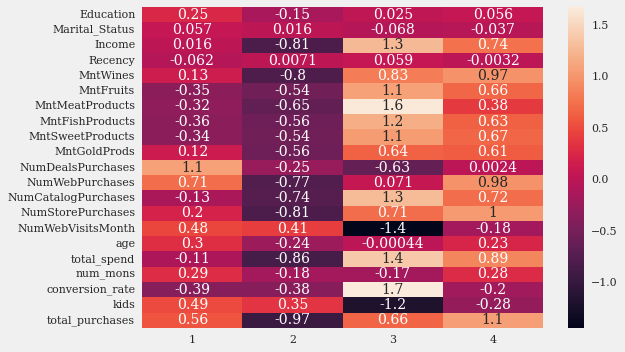

In [102]:
# visualise correlations between each cluster and features to gain customer behavior inisghts
sns.heatmap(data_snake.T, annot=True)

In [103]:
# prepare data for snake plot
from sklearn.preprocessing import MinMaxScaler

# create data
to_melt = data.copy()
to_melt.drop(['ID','Dt_Customer','Year_Birth','Kidhome',
             'Teenhome','total_spend', 'today'], 
             axis=1, inplace=True)

# convert column type
to_melt['Income'] = to_melt['Income'].astype(np.int64)
to_melt['num_mons'] = to_melt['num_mons'].astype(np.int64)
to_melt['conversion_rate'] = to_melt['conversion_rate'].astype(np.int64)
to_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2208 non-null   int64
 1   Marital_Status       2208 non-null   int64
 2   Income               2208 non-null   int64
 3   Recency              2208 non-null   int64
 4   MntWines             2208 non-null   int64
 5   MntFruits            2208 non-null   int64
 6   MntMeatProducts      2208 non-null   int64
 7   MntFishProducts      2208 non-null   int64
 8   MntSweetProducts     2208 non-null   int64
 9   MntGoldProds         2208 non-null   int64
 10  NumDealsPurchases    2208 non-null   int64
 11  NumWebPurchases      2208 non-null   int64
 12  NumCatalogPurchases  2208 non-null   int64
 13  NumStorePurchases    2208 non-null   int64
 14  NumWebVisitsMonth    2208 non-null   int64
 15  age                  2208 non-null   int64
 16  num_mons             220

In [104]:
# scale data
scaler = StandardScaler()
to_melt2 = scaler.fit_transform(to_melt)
to_melt2 = pd.DataFrame(to_melt2, columns=to_melt.columns)
to_melt2['label'] = kmeans.labels_ + 1
to_melt2.head(4)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,num_mons,conversion_rate,kids,total_purchases,label
0,-0.458673,-1.351719,0.292925,0.311060,0.975863,1.550053,1.688262,2.451041,1.481762,0.850833,...,1.425749,2.501580,-0.560167,0.698394,1.018743,1.683687,-0.476262,-1.266516,1.317746,4
1,-0.458673,-1.351719,-0.261644,-0.380080,-0.874099,-0.638273,-0.719275,-0.651903,-0.634855,-0.734941,...,-1.130379,-0.572908,-1.176741,-0.132230,1.275141,-1.018043,-0.476262,1.403143,-1.165726,2
2,-0.458673,0.739799,0.926537,-0.794765,0.356244,0.569079,-0.179808,1.337632,-0.148276,-0.038747,...,1.425749,-0.231298,1.289556,-0.547542,0.335013,0.332822,-0.476262,-1.266516,0.794910,4
3,-0.458673,0.739799,-1.187869,-0.794765,-0.874099,-0.562814,-0.656857,-0.505882,-0.586197,-0.754280,...,-0.765218,-0.914518,-0.560167,0.283082,-1.288844,-1.018043,-0.476262,0.068313,-0.904308,2


In [105]:
snake_columns = to_melt2.columns

In [106]:
# create snake data
snake_columns = to_melt2.columns
data_snake_melt = pd.melt(to_melt2.reset_index(),
                        # Assign Labels as ID variables                  
                        id_vars=['label'],
                        # Assign values 
                        value_vars=to_melt2.columns,
                        # Name the variable and value
                        var_name='Metric', value_name='Value'
					)
data_snake_melt

,label,Metric,Value
0,4,Education,-0.458673
1,2,Education,-0.458673
2,4,Education,-0.458673
3,2,Education,-0.458673
4,1,Education,1.532969
...,...,...,...
44155,4,total_purchases,0.402783
44156,1,total_purchases,0.925619
44157,4,total_purchases,0.533492
44158,4,total_purchases,1.056328


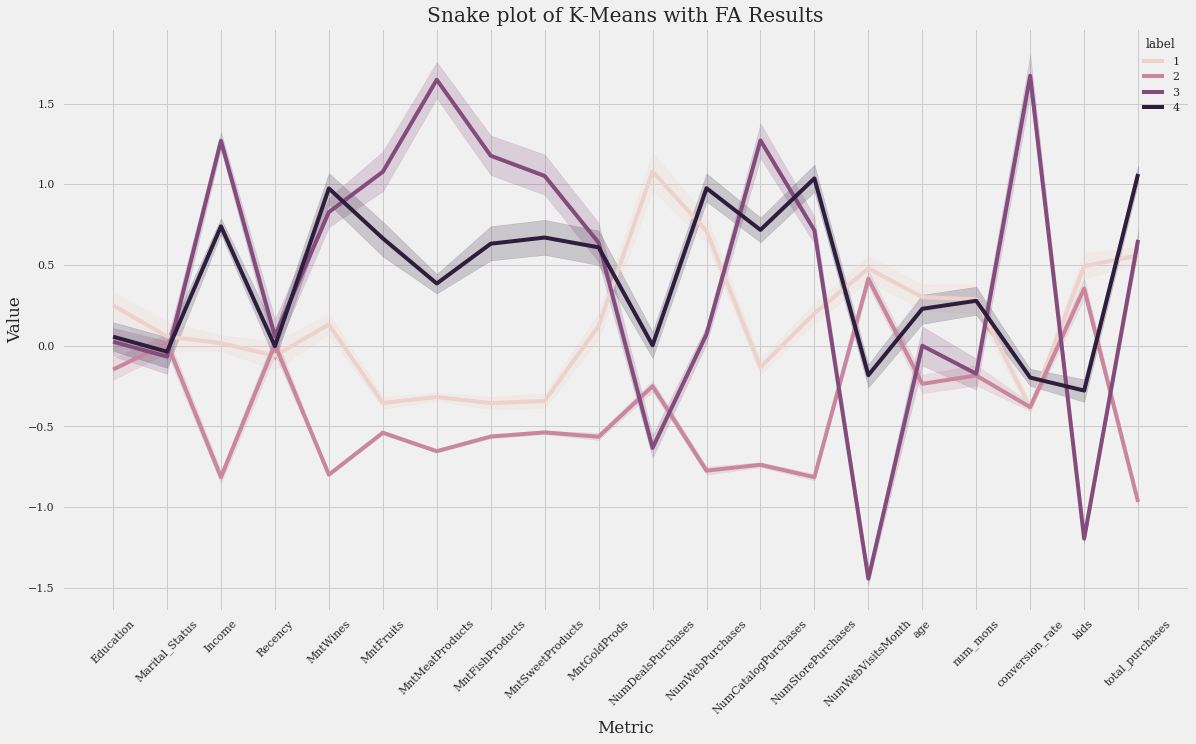

In [107]:
# Snake Plot
# ddd the plot title
fig, ax = plt.subplots(figsize=(18,10))
plt.title('Snake plot of K-Means with FA Results')

# ddd the x axis label
plt.xlabel('Metric')

# ddd the y axis label
plt.ylabel('Value')

# rotate xticks
plt.xticks(rotation = 45)

# plot a line for each value of the cluster variable
sns.lineplot(data=data_snake_melt, x='Metric', y='Value', hue='label')
plt.show()

## Customer Value Score

**What is Customer Value?**

Customer value is the customer’s perception of the worth of your product or service. The worth is the benefit that products provide to the target market, or the value for money they offer.

**What is Customer Value Score for?**

Customer value scoring helps track customer activities and behaviors and turn that data into a ranking system. With this value-based segmentation, we can define what “top performing” and “best customer” mean to the company (helps identify that valuable 20 percent).

**Calculation**

In order to get the customer value score, we first need to calculate the average order value and purchase frequency of each customer, which are the multiplied with each other. The average order value consists of the overall amount spent on products over the overall amount of purchases a customer makes. We get the purchase frequency by the overall number of purchases a customer makes over the overall number of unique customers. All of the data are displayed for the span of 2 years. 

Average Order Value * Purchase Frequency = Customer Value

*Average Order Value: Total amount spent on products / Total amount of purchases*

*Purchase Frequency: Total amount of purchases / Number of unique customers*

In [108]:
# Calculate Customer Value for each customer
# Customer Value = Average Order Value * Purchase Frequency

# Due to the limit of dataset, we will use the average purchase value from 
# the expenses and number of purchases over 2 years
data['average_order_value'] = data['total_spend']/data['total_purchases'] 

# the purchase frequency against the total number of customers over 2 years
data['purchase_frequency'] = data['total_purchases']/data.shape[0]

# the customer value
data['customer_value'] = data['average_order_value'] * data['purchase_frequency']

data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,age,total_spend,today,num_mons,conversion_rate,kids,total_purchases,average_order_value,purchase_frequency,customer_value
0,5524,1957,3,0,58138.0,0,0,2012-04-09,58,635,...,64,1617,2022-04-06 13:38:29.757901,10.0,0.43,0,25,64.680000,0.011322,0.732337
1,2174,1954,3,0,46344.0,1,1,2014-08-03,38,11,...,67,27,2022-04-06 13:38:29.757901,8.0,0.60,2,6,4.500000,0.002717,0.012228
2,4141,1965,3,1,71613.0,0,0,2013-08-21,26,426,...,56,776,2022-04-06 13:38:29.757901,9.0,0.75,0,21,36.952381,0.009511,0.351449
3,6182,1984,3,1,26646.0,1,0,2014-10-02,26,11,...,37,53,2022-04-06 13:38:29.757901,8.0,0.50,1,8,6.625000,0.003623,0.024004
4,5324,1981,5,1,58293.0,1,0,2014-01-19,94,173,...,40,422,2022-04-06 13:38:29.757901,8.0,0.60,1,19,22.210526,0.008605,0.191123
5,7446,1967,4,1,62513.0,0,1,2013-09-09,16,520,...,54,716,2022-04-06 13:38:29.757901,9.0,0.50,1,22,32.545455,0.009964,0.324275
6,965,1971,3,0,55635.0,0,1,2012-11-13,34,235,...,50,590,2022-04-06 13:38:29.757901,9.0,0.50,1,21,28.095238,0.009511,0.267210
7,6177,1985,5,1,33454.0,1,0,2013-08-05,32,76,...,36,169,2022-04-06 13:38:29.757901,9.0,0.38,1,10,16.900000,0.004529,0.076540
8,4855,1974,5,1,30351.0,1,0,2013-06-06,19,14,...,47,46,2022-04-06 13:38:29.757901,9.0,0.33,1,6,7.666667,0.002717,0.020833
9,5899,1950,5,1,5648.0,1,1,2014-03-13,68,28,...,71,49,2022-04-06 13:38:29.757901,8.0,0.15,2,2,24.500000,0.000906,0.022192


In [109]:
new_data = data.copy()

Text(0.5, 1.0, 'Distributon of Customer Value')

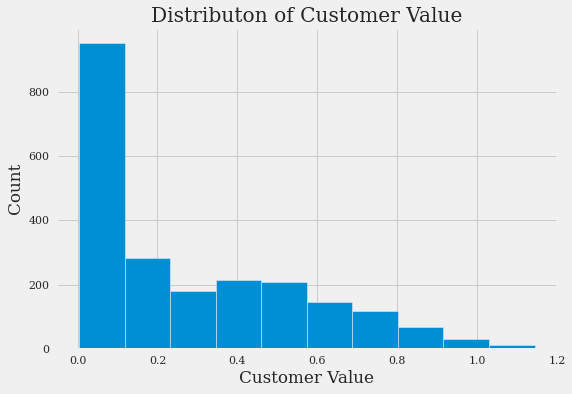

In [110]:
# distribution of 'customer_value'
new_data['customer_value'].hist()
plt.xlabel('Customer Value')
plt.ylabel('Count')
plt.title('Distributon of Customer Value')

In [111]:
# codifying customer values - creating new column with customer value score
def f(row):
    if row['customer_value'] >= 0.47:
        val = 1
    elif row['customer_value'] >= 0.18 and row['customer_value'] < 0.47:
        val = 2
    elif row['customer_value'] >= 0.03 and row['customer_value'] < 0.18:
        val = 3 
    else:
        val = 4
    return val

# apply function
new_data['cv_score'] = new_data.apply(f, axis=1)

Text(0.5, 1.0, 'Distribution of Customer Value Score')

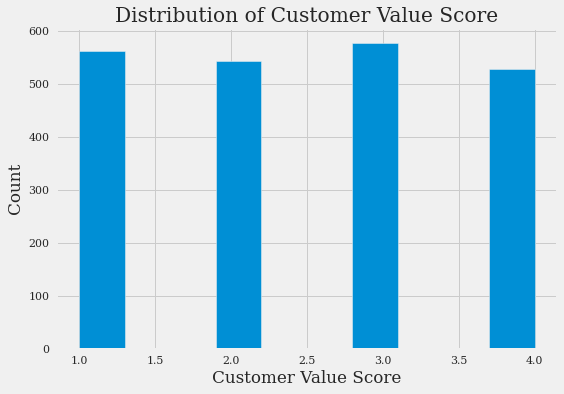

In [112]:
# distribution of 'cv_score'
new_data['cv_score'].hist()
plt.xlabel('Customer Value Score')
plt.ylabel('Count')
plt.title('Distribution of Customer Value Score')

In [113]:
new_data.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,total_spend,today,num_mons,conversion_rate,kids,total_purchases,average_order_value,purchase_frequency,customer_value,cv_score
0,5524,1957,3,0,58138.0,0,0,2012-04-09,58,635,...,1617,2022-04-06 13:38:29.757901,10.0,0.43,0,25,64.680000,0.011322,0.732337,1
1,2174,1954,3,0,46344.0,1,1,2014-08-03,38,11,...,27,2022-04-06 13:38:29.757901,8.0,0.60,2,6,4.500000,0.002717,0.012228,4
2,4141,1965,3,1,71613.0,0,0,2013-08-21,26,426,...,776,2022-04-06 13:38:29.757901,9.0,0.75,0,21,36.952381,0.009511,0.351449,2
3,6182,1984,3,1,26646.0,1,0,2014-10-02,26,11,...,53,2022-04-06 13:38:29.757901,8.0,0.50,1,8,6.625000,0.003623,0.024004,4


### Customers with Customer Value Score 1

In [114]:
# DataFrame for customers with Customer Value Score 1
cv_score1 = new_data[new_data['cv_score'] == 1]
cv_score1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,total_spend,today,num_mons,conversion_rate,kids,total_purchases,average_order_value,purchase_frequency,customer_value,cv_score
0,5524,1957,3,0,58138.0,0,0,2012-04-09,58,635,...,1617,2022-04-06 13:38:29.757901,10.0,0.43,0,25,64.680000,0.011322,0.732337,1
12,2125,1959,3,0,63033.0,0,0,2013-11-15,82,194,...,1102,2022-04-06 13:38:29.757901,8.0,1.50,0,16,68.875000,0.007246,0.499094,1
15,2114,1946,5,0,82800.0,0,0,2012-11-24,23,1006,...,1315,2022-04-06 13:38:29.757901,9.0,1.00,0,26,50.576923,0.011775,0.595562,1
18,6565,1949,4,1,76995.0,0,1,2013-03-28,91,1012,...,1782,2022-04-06 13:38:29.757901,9.0,0.60,1,26,68.538462,0.011775,0.807065,1
21,5376,1979,3,1,2447.0,1,0,2013-06-01,42,1,...,1730,2022-04-06 13:38:29.757901,9.0,0.00,1,43,40.232558,0.019475,0.783514,1


### Customers with Customer Value Score 2

In [115]:
# DataFrame for customers with Customer Value Score 2
cv_score2 = new_data[new_data['cv_score'] == 2]
cv_score2.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,total_spend,today,num_mons,conversion_rate,kids,total_purchases,average_order_value,purchase_frequency,customer_value,cv_score
2,4141,1965,3,1,71613.0,0,0,2013-08-21,26,426,...,776,2022-04-06 13:38:29.757901,9.0,0.75,0,21,36.952381,0.009511,0.351449,2
4,5324,1981,5,1,58293.0,1,0,2014-01-19,94,173,...,422,2022-04-06 13:38:29.757901,8.0,0.60,1,19,22.210526,0.008605,0.191123,2
5,7446,1967,4,1,62513.0,0,1,2013-09-09,16,520,...,716,2022-04-06 13:38:29.757901,9.0,0.50,1,22,32.545455,0.009964,0.324275,2
6,965,1971,3,0,55635.0,0,1,2012-11-13,34,235,...,590,2022-04-06 13:38:29.757901,9.0,0.50,1,21,28.095238,0.009511,0.267210,2
22,1993,1949,5,1,58607.0,0,1,2012-12-23,63,867,...,972,2022-04-06 13:38:29.757901,9.0,0.38,1,17,57.176471,0.007699,0.440217,2


### Customers with Customer Value Score 3

In [116]:
# DataFrame for customers with Customer Value Score 3
cv_score3 = new_data[new_data['cv_score'] == 3]
cv_score3.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,total_spend,today,num_mons,conversion_rate,kids,total_purchases,average_order_value,purchase_frequency,customer_value,cv_score
7,6177,1985,5,1,33454.0,1,0,2013-08-05,32,76,...,169,2022-04-06 13:38:29.757901,9.0,0.38,1,10,16.900000,0.004529,0.076540,3
13,8180,1952,4,0,59354.0,1,1,2013-11-15,53,233,...,310,2022-04-06 13:38:29.757901,8.0,0.50,2,15,20.666667,0.006793,0.140399,3
16,9736,1980,3,1,41850.0,1,1,2012-12-24,51,53,...,96,2022-04-06 13:38:29.757901,9.0,0.38,2,9,10.666667,0.004076,0.043478,3
17,4939,1946,3,1,37760.0,0,0,2012-08-31,20,84,...,317,2022-04-06 13:38:29.757901,10.0,0.43,0,13,24.384615,0.005888,0.143569,3
19,2278,1985,2,0,33812.0,1,0,2012-03-11,86,4,...,133,2022-04-06 13:38:29.757901,10.0,0.50,1,8,16.625000,0.003623,0.060236,3


### Customers with Customer Value Score 4

In [117]:
# DataFrame for customers with Customer Value Score 1
cv_score4 = new_data[new_data['cv_score'] == 4]
cv_score4.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,total_spend,today,num_mons,conversion_rate,kids,total_purchases,average_order_value,purchase_frequency,customer_value,cv_score
1,2174,1954,3,0,46344.0,1,1,2014-08-03,38,11,...,27,2022-04-06 13:38:29.757901,8.0,0.60,2,6,4.500000,0.002717,0.012228,4
3,6182,1984,3,1,26646.0,1,0,2014-10-02,26,11,...,53,2022-04-06 13:38:29.757901,8.0,0.50,1,8,6.625000,0.003623,0.024004,4
8,4855,1974,5,1,30351.0,1,0,2013-06-06,19,14,...,46,2022-04-06 13:38:29.757901,9.0,0.33,1,6,7.666667,0.002717,0.020833,4
9,5899,1950,5,1,5648.0,1,1,2014-03-13,68,28,...,49,2022-04-06 13:38:29.757901,8.0,0.15,2,2,24.500000,0.000906,0.022192,4
11,387,1976,1,1,7500.0,0,0,2012-11-13,59,6,...,61,2022-04-06 13:38:29.757901,9.0,0.38,0,6,10.166667,0.002717,0.027627,4


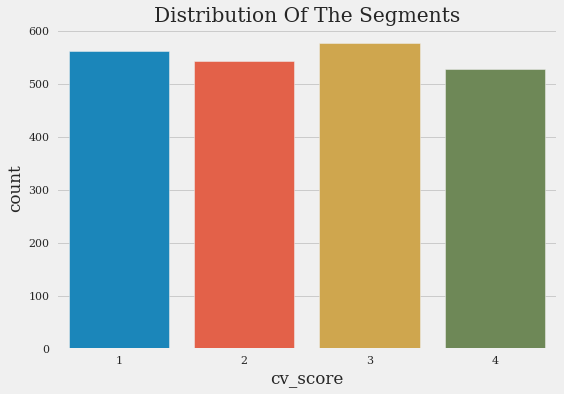

In [118]:
# Distribution of customer segments
sns.countplot(x=new_data['cv_score']).set_title("Distribution Of The Segments")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


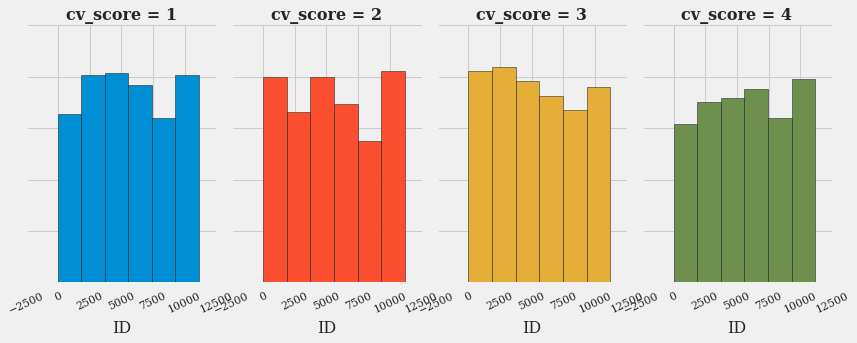

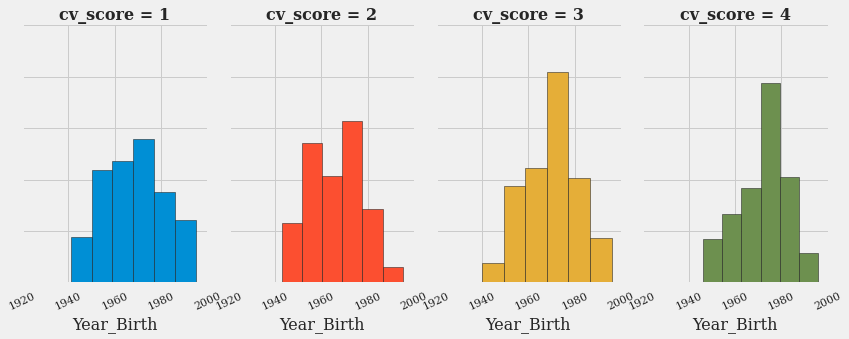

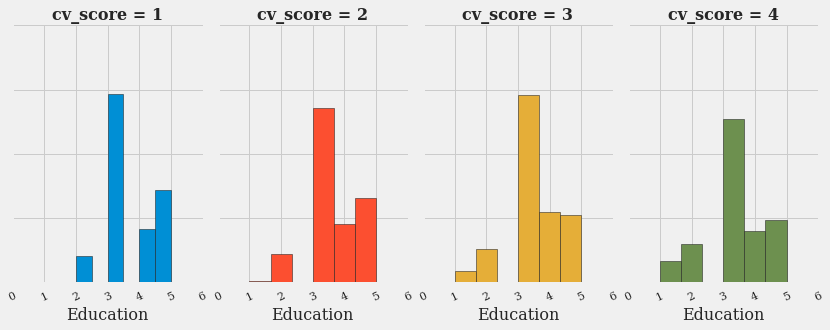

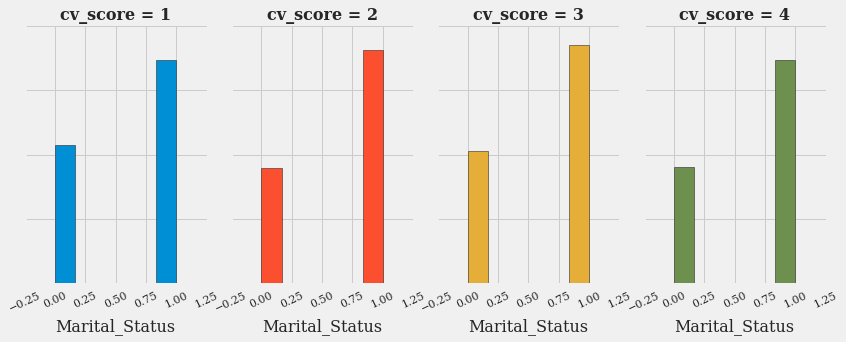

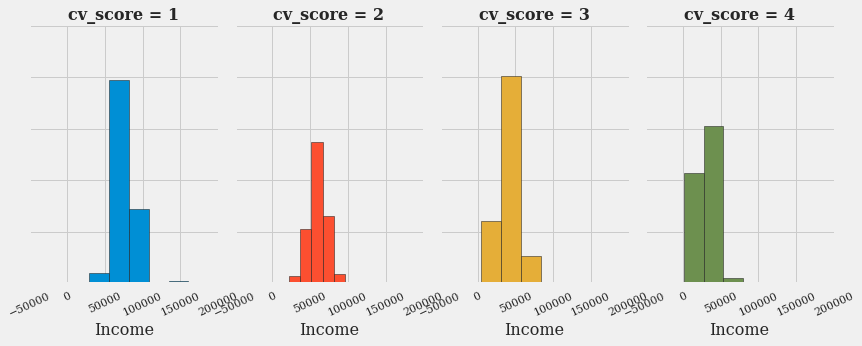

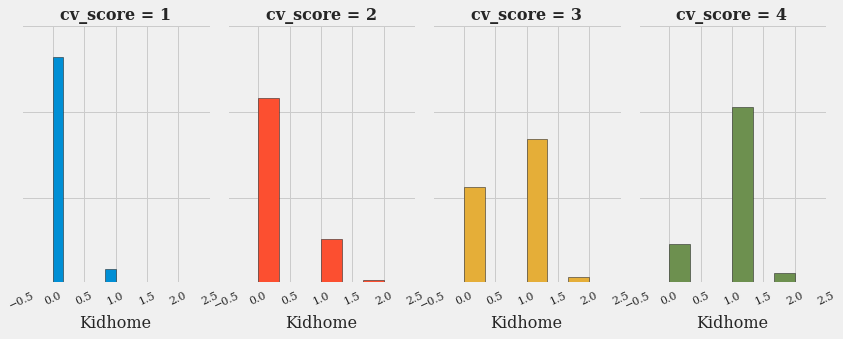

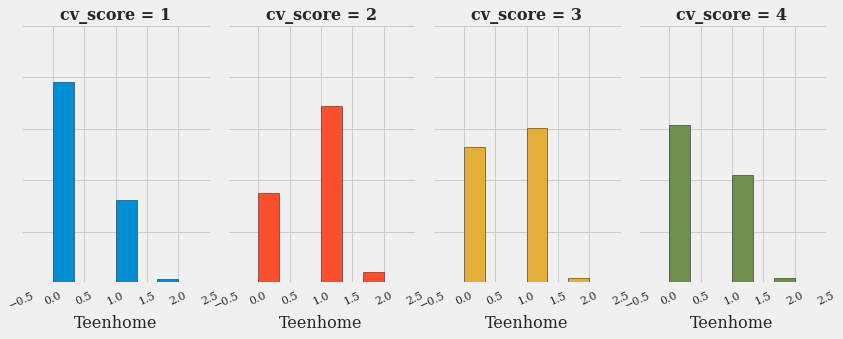

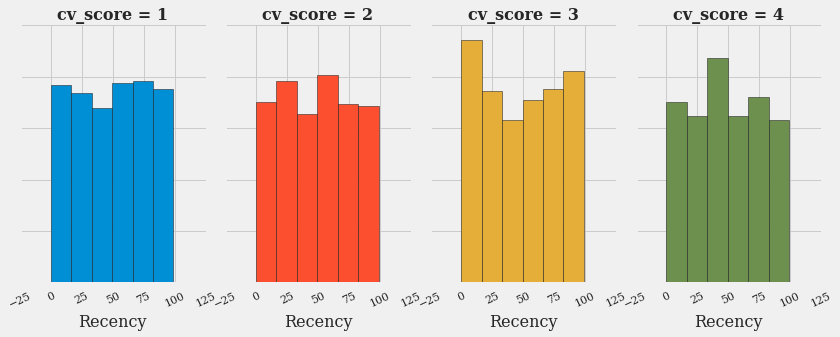

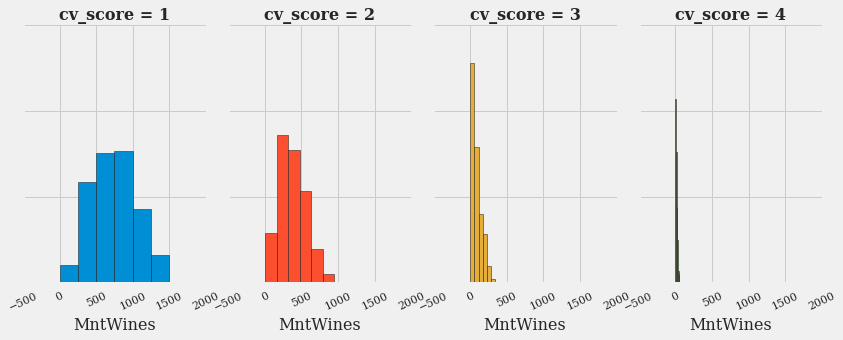

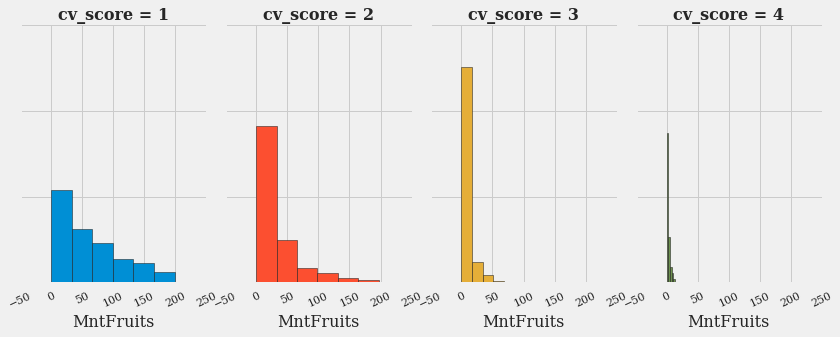

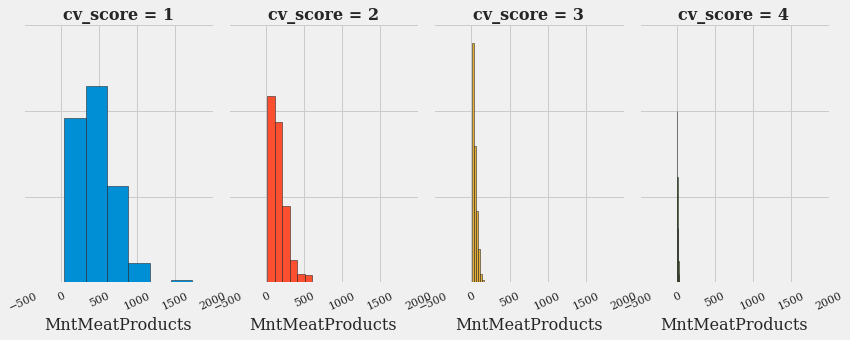

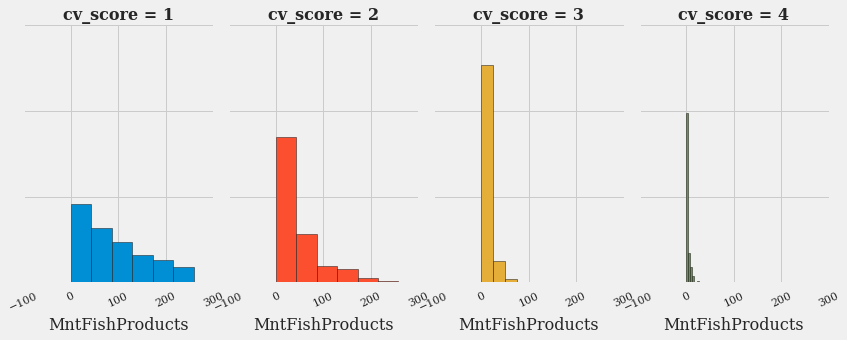

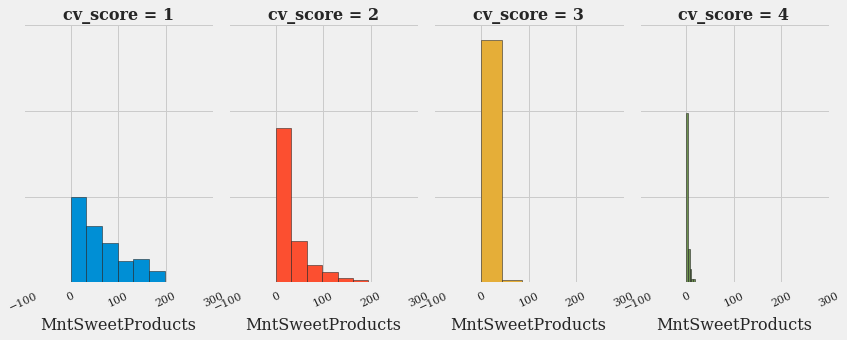

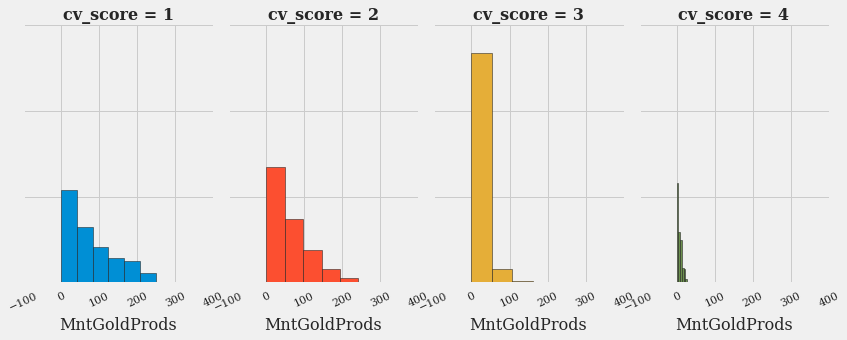

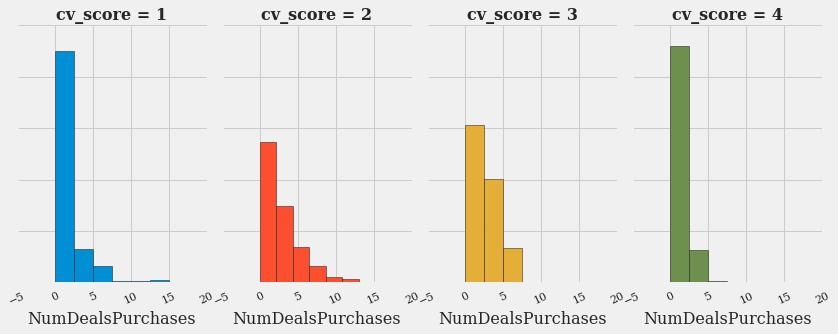

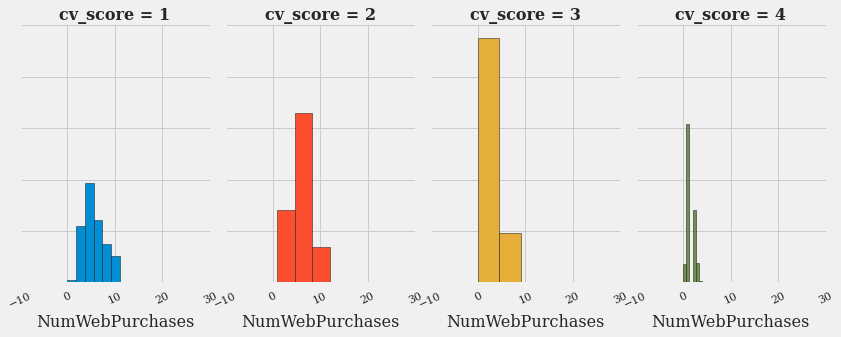

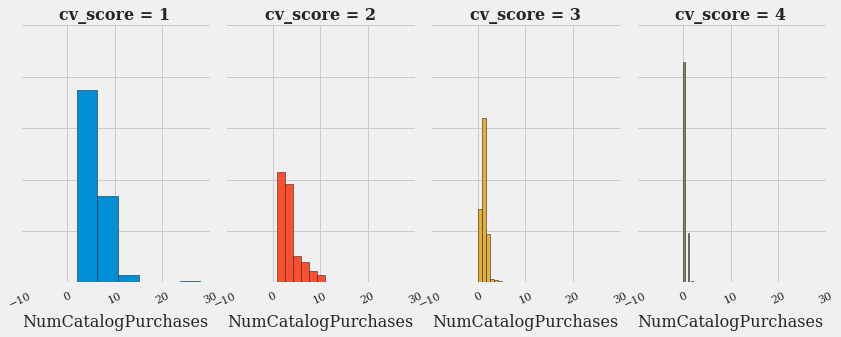

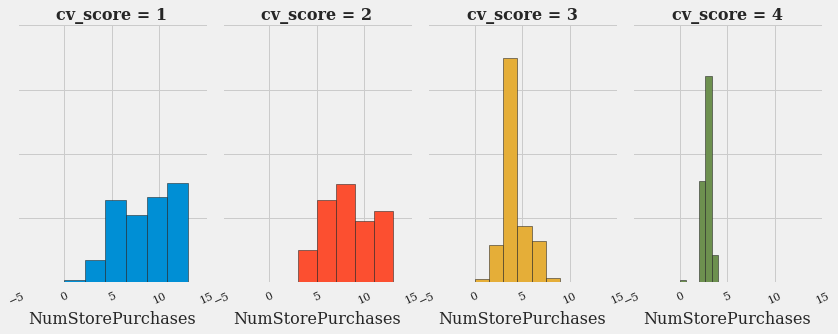

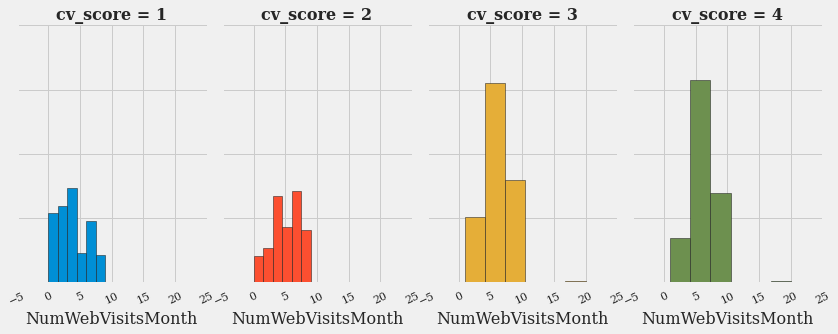

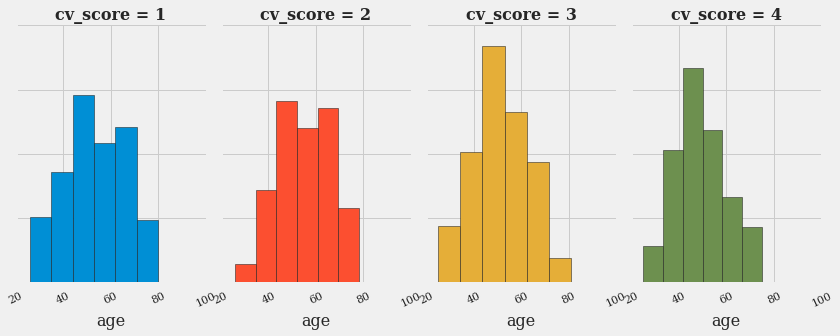

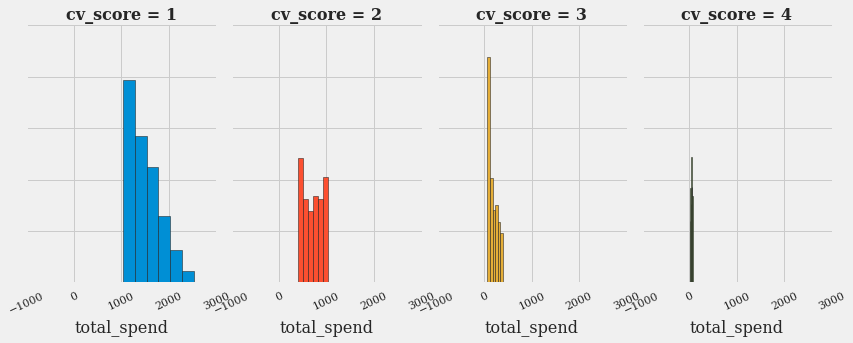

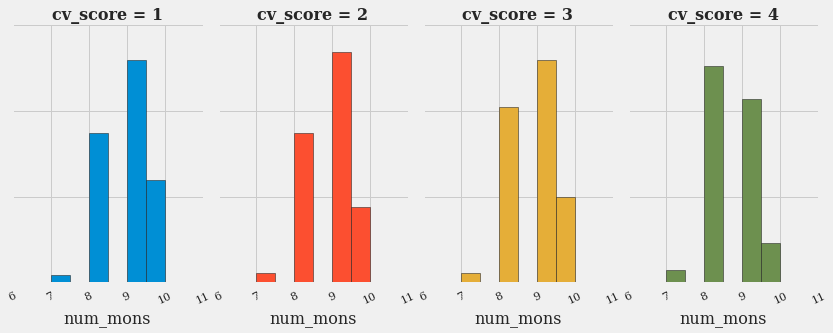

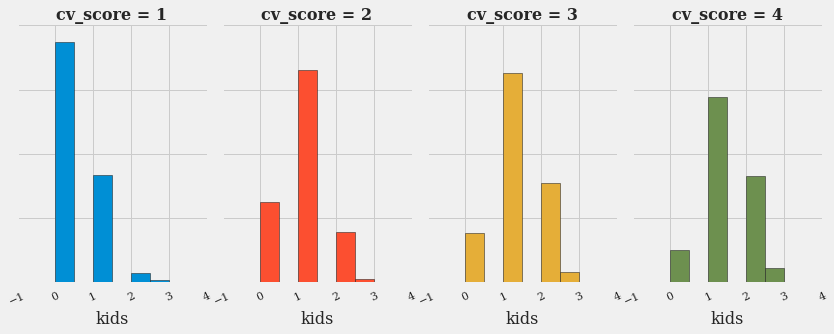

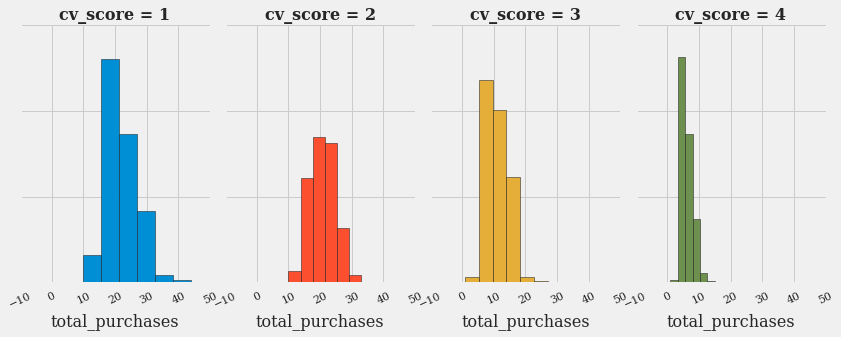

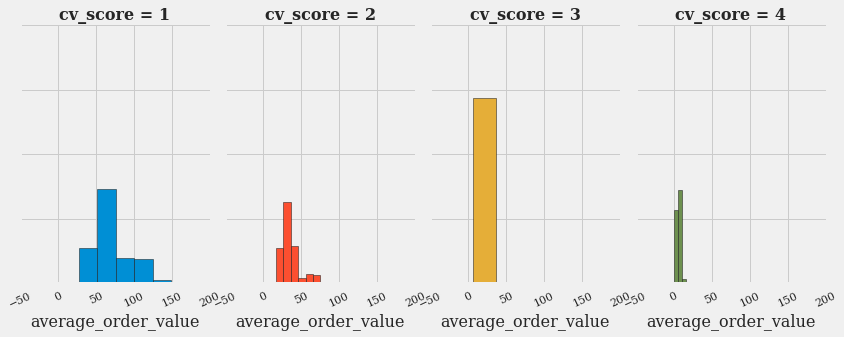

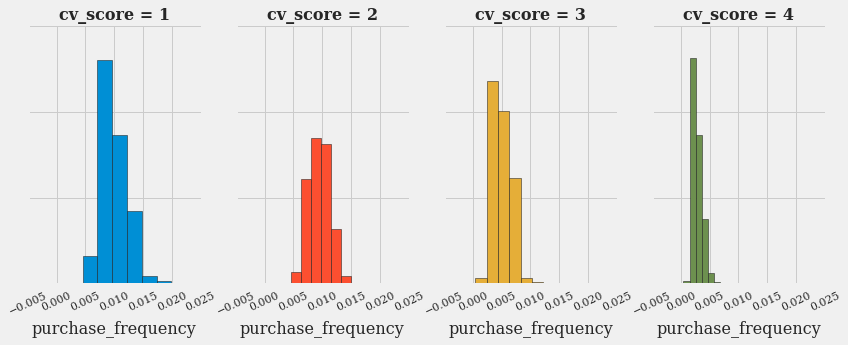

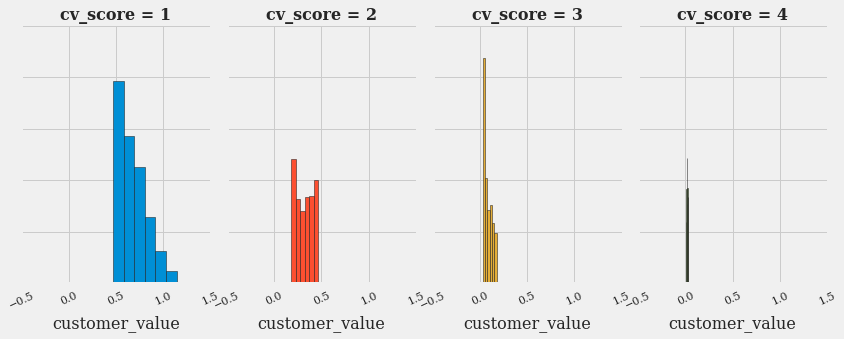

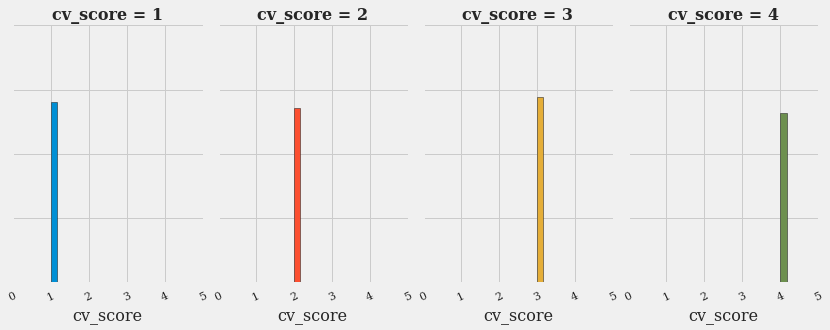

In [119]:
# drop unncessary column
new_data2 = new_data.drop(['today','Dt_Customer','conversion_rate'], axis=1)

# Display distribution of all variables for each customer segment
for i in new_data2:
    diag = sns.FacetGrid(new_data2, col = "cv_score", hue = "cv_score")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25)
    diag.set_yticklabels()
    diag.set_xlabels(size=16)
    diag.set_titles(size=16, fontweight="bold")
    diag.fig.set_figheight(6)

#### Based on the Customer Value Scoring, we can divide the customers into 4 segments:
Segment 1: cv_score=1
    
Segment 2: cv_score=2
    
Segment 3: cv_score=3
    
Segment 4: cv_score=4

The distribution of clusters plot suggest that customers are evenly distributed across all 4 segments.

***Segment 1***
- Age: Oldest group of customers (50-85)
- Income: Above average
- Kidhome: Do not have kids
- Teenhome: Do not have teens either
- Products: Like wine especially and meat, have the highest number of purchases
- Channel: Prefer shopping in store as opposed to online, do not seek deals

    
***Segment 2***
- Age: In the midde of age range
- Income: Average
- Kidhome: Most do not have kids
- Teenhome: However, majority has a teen 
- Products: Like wine, gold
- Channel: Prefer shopping in store and look for deals


***Segment 3***
- Age: In the midde of the age range
- Income: Average
- Kidhome: Most have 1 kid at 
- Teenhome: Most also have 1 teen
- Products: Preferred products include fish and meat
- Channel: Prefer shopping online and look for deals


***Seegment 4***
- Age: Older group of customers (50-75)
- Income: Below average
- Kidhome: Most have at least 1 kid at home
- Teenhome Majority does not have a teen
- Products: The most price sensitive group of customers with the least amount of purchases
- Channel: Mostly catalog and in store



This notebook aims to support the report. Thank you for reading.

Group 14.